#### **Exploratory Data Analysis**

The objective of this EDA is to find how the phishing URLs differs from the legitimate URLs based on the structural features, what are the common structural patterns observed among the Phishing URLs, relationship among the features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/transformed/final_raw_data.csv')

data.head()

,url,label
0,https://adoaeco.cn/Loggin,phishing
1,https://gageparkhighschool.com/QTeuUe,phishing
2,https://wwnox.miraltek.cfd/qzxn3,phishing
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing
4,https://yqcjl.miraltek.cfd/plis0,phishing


In [4]:
print(data.shape)

(253051, 2)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     253051 non-null  object
 1   label   253051 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [6]:
data.describe()

,url,label
count,253051,253051
unique,253051,2
top,https://adoaeco.cn/Loggin,legitimate
freq,1,129418


From the URLs of the dataset, different structural features are extracted and categorized into 8 feature groups.

1. **URL Components Data** : This group contains the fundamental concepts extracted from the URL.
- _protocol_ : The communication protocol used. (e.g., http, https)
- _domain_ : The main domain of the URL.
- _subdomain_ : Subdomains preceding the main domain.
- _tld_ : Extension of the domain (e.g., .com, .org)
- _sld_ : Portion of the domain directly before the TLD.
- _path_ : Path or directory structure of the URL.
- _query_ : Query string containing parameters passed after '?'

In [7]:
url_components_df = pd.read_csv('data/transformed/1.url_components_data.csv')

url_components_df.head()

,url,label,protocol,domain,subdomain,tld,sld,path,query
0,https://adoaeco.cn/Loggin,phishing,https,adoaeco.cn,NaN,cn,adoaeco,/Loggin,NaN
1,https://gageparkhighschool.com/QTeuUe,phishing,https,gageparkhighschool.com,NaN,com,gageparkhighschool,/QTeuUe,NaN
2,https://wwnox.miraltek.cfd/qzxn3,phishing,https,wwnox.miraltek.cfd,wwnox,cfd,miraltek,/qzxn3,NaN
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,https,halfetitur.com,NaN,com,halfetitur,/,token=r2I0IU0FEHfPf5Dn
4,https://yqcjl.miraltek.cfd/plis0,phishing,https,yqcjl.miraltek.cfd,yqcjl,cfd,miraltek,/plis0,NaN


2. **URL Component Length Features Data** : This group included features that quantify the length and structural complexity of different URL components.
- *url_len* : Total length of the URL
- *domain_len* : Length of the Domain portion of the URL
- *path_len* : Length of the URL Path
- *query_len* : Length of the Query string
- *url_depth* : No. of '/' segments in the URL path, reflecting its depth.***
- *subdomain_count* : No. of subdomains present in the URL.

In [8]:
len_features_df = pd.read_csv('data/transformed/2.component_len_features_data.csv')

len_features_df.head()

,url,label,url_len,domain_len,path_len,query_len,url_depth,subdomain_count
0,https://adoaeco.cn/Loggin,phishing,25,10,6,0,1,1
1,https://gageparkhighschool.com/QTeuUe,phishing,37,22,6,0,1,1
2,https://wwnox.miraltek.cfd/qzxn3,phishing,32,18,5,0,1,1
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,46,14,0,22,1,1
4,https://yqcjl.miraltek.cfd/plis0,phishing,32,18,5,0,1,1


3. **Domain Features Data** : This group captures domain portions of the URL.
- *tld_len* : Length of the Top-Level Domain (TLD) portion of the URL.
- *url_has_ipv4* : Indicates whether the URL contains an IPv4 address instead of a standard domain name.
- *url_has_port* : Indicates whether the URL includes a port number.

In [9]:
domain_features_df = pd.read_csv('data/transformed/3.domain_features_data.csv')

domain_features_df.head()

,url,label,tld,tld_len,url_has_ipv4,url_has_port
0,https://adoaeco.cn/Loggin,phishing,cn,2,False,False
1,https://gageparkhighschool.com/QTeuUe,phishing,com,3,False,False
2,https://wwnox.miraltek.cfd/qzxn3,phishing,cfd,3,False,False
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,com,3,False,False
4,https://yqcjl.miraltek.cfd/plis0,phishing,cfd,3,False,False


4. **SLD Features Data** : This category focuses on strutural & lexical characteristics of the SLD.
- *sld_len* : Length of the Second-Level Domain (SLD) of the URL.
- *sld_has_digit* : Indicates whether the SLD contains any digit.
- *sld_has_hyphen* : Indicates whether the SLD is separated by any hyphen.
- *sld_token_count* : Count of no. of tokens in SLD.

In [10]:
sld_features_df = pd.read_csv('data/transformed/4.sld_features_data.csv')

sld_features_df.head()

,url,label,sld,sld_len,sld_has_digit,sld_has_hyphen,sld_token_count
0,https://adoaeco.cn/Loggin,phishing,adoaeco,7,False,False,1
1,https://gageparkhighschool.com/QTeuUe,phishing,gageparkhighschool,18,False,False,1
2,https://wwnox.miraltek.cfd/qzxn3,phishing,miraltek,8,False,False,1
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,halfetitur,10,False,False,1
4,https://yqcjl.miraltek.cfd/plis0,phishing,miraltek,8,False,False,1


5. **Character Features Data** : This category contains character-level patterns within different components of the URL.
- *dot_count_in_domain* : No. of dots('.') present in domain.
- *hyphen_count_domain_path* : No. of hyphens('-') present in domain & path combined.
- *underscore_count_path_query* : No.of underscores('_') present in path & query portions of the URL.
- *slash_count* : No. of slashes('/') in the URL.
- *digit_count* : No. of digits('/) in the URL.
- *alphabet_count* : No. of alphabetic characters in the URL.
- *spl_char_count* : No. of special characters in the URL.

In [11]:
char_feature_df = pd.read_csv('data/transformed/5.char_features_data.csv')

char_feature_df.head()

,url,label,dot_count_domain,hyphen_count_domain_path,underscore_count_path_query,slash_count,digit_count,alphabet_count,spl_char_count
0,https://adoaeco.cn/Loggin,phishing,1,0,0,3,0,20,5
1,https://gageparkhighschool.com/QTeuUe,phishing,1,0,0,3,0,32,5
2,https://wwnox.miraltek.cfd/qzxn3,phishing,2,0,0,3,1,25,6
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,1,0,0,3,4,35,7
4,https://yqcjl.miraltek.cfd/plis0,phishing,2,0,0,3,1,25,6


6. **Entropy Features Data** : This category represents the randomness or unpredictability within different components of the URL. 
- *url_entropy* : Entropy of the full URL.
- *domain_entropy* : Entropy calculated from the domain portion of the URL.
- *sld_entropy* : Entropy of the Second-Level Domain (SLD).
- *path_entropy* : Entropy of the URL path.

In [12]:
entropy_feature_df = pd.read_csv('data/transformed/6.entropy_feature_data.csv')

entropy_feature_df.head()

,url,label,url_entropy,domain_entropy,sld_entropy,path_entropy
0,https://adoaeco.cn/Loggin,phishing,3.863465,2.721928,2.235926,2.521641
1,https://gageparkhighschool.com/QTeuUe,phishing,4.208925,3.629220,3.419382,2.521641
2,https://wwnox.miraltek.cfd/qzxn3,phishing,4.452820,3.947703,3.000000,2.584963
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,4.760096,3.664498,3.121928,-0.000000
4,https://yqcjl.miraltek.cfd/plis0,phishing,4.241729,3.836592,3.000000,2.584963


7. **Token Features Data** : This category captures token-level characteristics derived from splitting different URL components.
- *domain_token_count* : No. of tokens in domain
- *path_token_count* : No. of tokens in path
- *total_tokens* : Total tokens by combining Domain and Path.
- *avg_token_length* : Average length of each token in the URL.***

In [13]:
token_feature_df = pd.read_csv('data/transformed/7.token_features_data.csv')

token_feature_df.head()

,url,label,domain_token_count,path_token_count,total_tokens,avg_token_length
0,https://adoaeco.cn/Loggin,phishing,2,1,3,5.00
1,https://gageparkhighschool.com/QTeuUe,phishing,2,1,3,9.00
2,https://wwnox.miraltek.cfd/qzxn3,phishing,3,1,4,5.25
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,2,1,3,8.50
4,https://yqcjl.miraltek.cfd/plis0,phishing,3,1,4,5.25


8. **Hexadecimal Features Data** : 
- *has_hex* : Indicates whether the URL contains any hexadecimal characters (0-9, A-F, a-f).
- *hex_char_count* : No. of hexadecimal characters present in the URL.
- *hex_ratio* : Ratio of hexadecimal characters to the total URL length.

In [14]:
hex_feature_df = pd.read_csv('data/transformed/8.hex_features_data.csv')

hex_feature_df.head()

,url,label,has_hex,hex_char_count,hex_ratio
0,https://adoaeco.cn/Loggin,phishing,False,0,0.0
1,https://gageparkhighschool.com/QTeuUe,phishing,False,0,0.0
2,https://wwnox.miraltek.cfd/qzxn3,phishing,False,0,0.0
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,False,0,0.0
4,https://yqcjl.miraltek.cfd/plis0,phishing,False,0,0.0


In [15]:
print("Components of the URL:\n",list(url_components_df.columns)[2:])
print("\nLength features of the URL:\n",list(len_features_df.columns)[2:])
print("\nTLD features of the URL:\n",list(domain_features_df.columns)[2:])
print("\nSLD features of the URL:\n",list(sld_features_df.columns)[2:])
print("\nCharacter features of the URL:\n",list(char_feature_df.columns)[2:])
print("\nEntropy features of the URL:\n",list(entropy_feature_df.columns)[2:])
print("\nToken features of the URL:\n",list(token_feature_df.columns)[2:])
print("\nHexadecimal features of the URL:\n",list(hex_feature_df.columns)[2:])

Components of the URL:
 ['protocol', 'domain', 'subdomain', 'tld', 'sld', 'path', 'query']

Length features of the URL:
 ['url_len', 'domain_len', 'path_len', 'query_len', 'url_depth', 'subdomain_count']

TLD features of the URL:
 ['tld', 'tld_len', 'url_has_ipv4', 'url_has_port']

SLD features of the URL:
 ['sld', 'sld_len', 'sld_has_digit', 'sld_has_hyphen', 'sld_token_count']

Character features of the URL:
 ['dot_count_domain', 'hyphen_count_domain_path', 'underscore_count_path_query', 'slash_count', 'digit_count', 'alphabet_count', 'spl_char_count']

Entropy features of the URL:
 ['url_entropy', 'domain_entropy', 'sld_entropy', 'path_entropy']

Token features of the URL:
 ['domain_token_count', 'path_token_count', 'total_tokens', 'avg_token_length']

Hexadecimal features of the URL:
 ['has_hex', 'hex_char_count', 'hex_ratio']


In [16]:
df_dict = {
    'URL components' : url_components_df,
    'Length features' : len_features_df,
    'Domain features' : domain_features_df,
    'SLD features' : sld_features_df,
    'Character features' : char_feature_df,
    'Entropy features' : entropy_feature_df,
    'Token features' : token_feature_df,
    'Hexadecimal features' : hex_feature_df
}

**Check for null values**

In [17]:
def null_cols(df):
    null_counts = df.isnull().sum()
    null_cols = null_counts[null_counts > 0]

    if not null_counts.empty:
        print(null_cols)
    else:
        print('No null values found')

In [18]:
for df_name,df in df_dict.items():
    print(df_name)
    null_cols(df)
    print()

URL components
domain         2283
subdomain     64887
tld            2435
sld            2286
path          48380
query        214330
dtype: int64

Length features
Series([], dtype: int64)

Domain features
tld    2435
dtype: int64

SLD features
sld    2286
dtype: int64

Character features
Series([], dtype: int64)

Entropy features
Series([], dtype: int64)

Token features
Series([], dtype: int64)

Hexadecimal features
Series([], dtype: int64)



In [19]:
domain_features_df[domain_features_df['tld'].isnull()]

,url,label,tld,tld_len,url_has_ipv4,url_has_port
2994,https://91.92.241.186,phishing,NaN,0,True,False
3667,https://140.99.164.68/x0,phishing,NaN,0,True,False
6300,https://31.172.87.101/x0,phishing,NaN,0,True,False
14536,https://43.153.99.18,phishing,NaN,0,True,False
16733,https://185.187.56.126,phishing,NaN,0,True,False
...,...,...,...,...,...,...
252716,http://191.101.7.221/fire/aasdqwe,phishing,NaN,0,True,False
252811,http://91.239.25.38:6892,phishing,NaN,0,True,True
252961,http://178.217.186.224/panel/etc/info/toke/cp....,phishing,NaN,0,True,False
252990,http://185.75.46.73/information.cgi,phishing,NaN,0,True,False


In [20]:
sld_features_df.loc[sld_features_df['sld'].isnull()]

,url,label,sld,sld_len,sld_has_digit,sld_has_hyphen,sld_token_count
2994,https://91.92.241.186,phishing,NaN,0,False,False,1
3667,https://140.99.164.68/x0,phishing,NaN,0,False,False,1
6300,https://31.172.87.101/x0,phishing,NaN,0,False,False,1
14536,https://43.153.99.18,phishing,NaN,0,False,False,1
16733,https://185.187.56.126,phishing,NaN,0,False,False,1
...,...,...,...,...,...,...,...
252716,http://191.101.7.221/fire/aasdqwe,phishing,NaN,0,False,False,1
252811,http://91.239.25.38:6892,phishing,NaN,0,False,False,1
252961,http://178.217.186.224/panel/etc/info/toke/cp....,phishing,NaN,0,False,False,1
252990,http://185.75.46.73/information.cgi,phishing,NaN,0,False,False,1


**_Insights_**
- URL Components Dataframe, Domain features Dataframe, SLD features Dataframe consists of null values.
- The reason for null values in URL component dataframe is due to the absence of components in the URL.
- Since the URLs containing IP address does not have TLD, null values are present in tld column of Domain feature dataframe.
- The SLDs of some URLs are null in SLD feature dataframe because the URLs were intentionally made to fail parsing.

#### **Exploring data**

1. **URL Components Data**

In [21]:
url_components_df.head()

,url,label,protocol,domain,subdomain,tld,sld,path,query
0,https://adoaeco.cn/Loggin,phishing,https,adoaeco.cn,NaN,cn,adoaeco,/Loggin,NaN
1,https://gageparkhighschool.com/QTeuUe,phishing,https,gageparkhighschool.com,NaN,com,gageparkhighschool,/QTeuUe,NaN
2,https://wwnox.miraltek.cfd/qzxn3,phishing,https,wwnox.miraltek.cfd,wwnox,cfd,miraltek,/qzxn3,NaN
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,https,halfetitur.com,NaN,com,halfetitur,/,token=r2I0IU0FEHfPf5Dn
4,https://yqcjl.miraltek.cfd/plis0,phishing,https,yqcjl.miraltek.cfd,yqcjl,cfd,miraltek,/plis0,NaN


In [22]:
url_components_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   url        253051 non-null  object
 1   label      253051 non-null  object
 2   protocol   253051 non-null  object
 3   domain     250768 non-null  object
 4   subdomain  188164 non-null  object
 5   tld        250616 non-null  object
 6   sld        250765 non-null  object
 7   path       204671 non-null  object
 8   query      38721 non-null   object
dtypes: object(9)
memory usage: 17.4+ MB


In [23]:
url_components_df.describe()

,url,label,protocol,domain,subdomain,tld,sld,path,query
count,253051,253051,253051,250768,188164,250616,250765,204671,38721
unique,253051,2,3,126787,36296,857,82183,157104,27811
top,https://adoaeco.cn/Loggin,legitimate,https,docs.google.com,www,com,google,/,start=false&amp;loop=false&amp;delayms=3000
freq,1,129418,182717,6772,101299,155806,10071,3506,3149


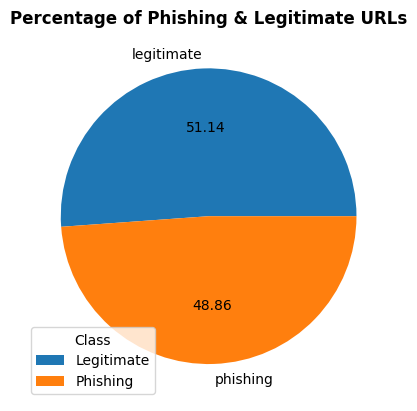

In [24]:
url_components_df.label.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Percentage of Phishing & Legitimate URLs',weight='bold',color="#000000")
plt.legend(labels=['Legitimate','Phishing'],title='Class')
plt.ylabel("");

**_Insights_**
- The dataset contains almost equal numbers of phishing and legitimate URLs, making it balanced.

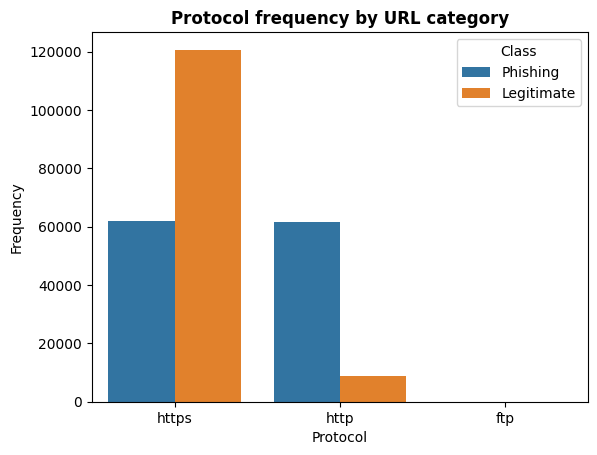

In [25]:
sns.countplot(data=url_components_df,x='protocol',hue='label')
plt.title('Protocol frequency by URL category',weight='bold')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.legend(['Phishing','Legitimate'],title='Class');

**_Insights_**
- The dataset contains three types of URL protocols : https, http, ftp.
- Legitimate URLs mostly use https, while phishing URLs are split between https and https.
- ftp protocol appears extremely rarely and used by phishing URLs only.

Do the presence and absence of URL components reveal structural differences between phishing and legitimate URLs?

In [26]:
def plot_null_vs_notnull(col,ax):
    phishing_null = url_components_df.loc[url_components_df['label'] == 'phishing',col].isnull().sum()
    phishing_not_null = url_components_df.loc[url_components_df['label'] == 'phishing',col].notnull().sum()

    legitimate_null = url_components_df.loc[url_components_df['label'] == 'legitimate',col].isnull().sum()
    legitimate_not_null = url_components_df.loc[url_components_df['label'] == 'legitimate',col].notnull().sum()

    null_df = pd.DataFrame({
        'null' : [phishing_null,legitimate_null],
        'not_null' : [phishing_not_null,legitimate_not_null]
    },index=['Phishing','Legitimate'])

    null_df.plot(kind='bar',ax=ax,rot=0)
    ax.set_title(f'Null vs Not Null frequency by {col.title()}')
    ax.set_xlabel(f'{col.title()}')
    ax.set_ylabel('Frequency')
    ax.legend(title='Class',loc=9)

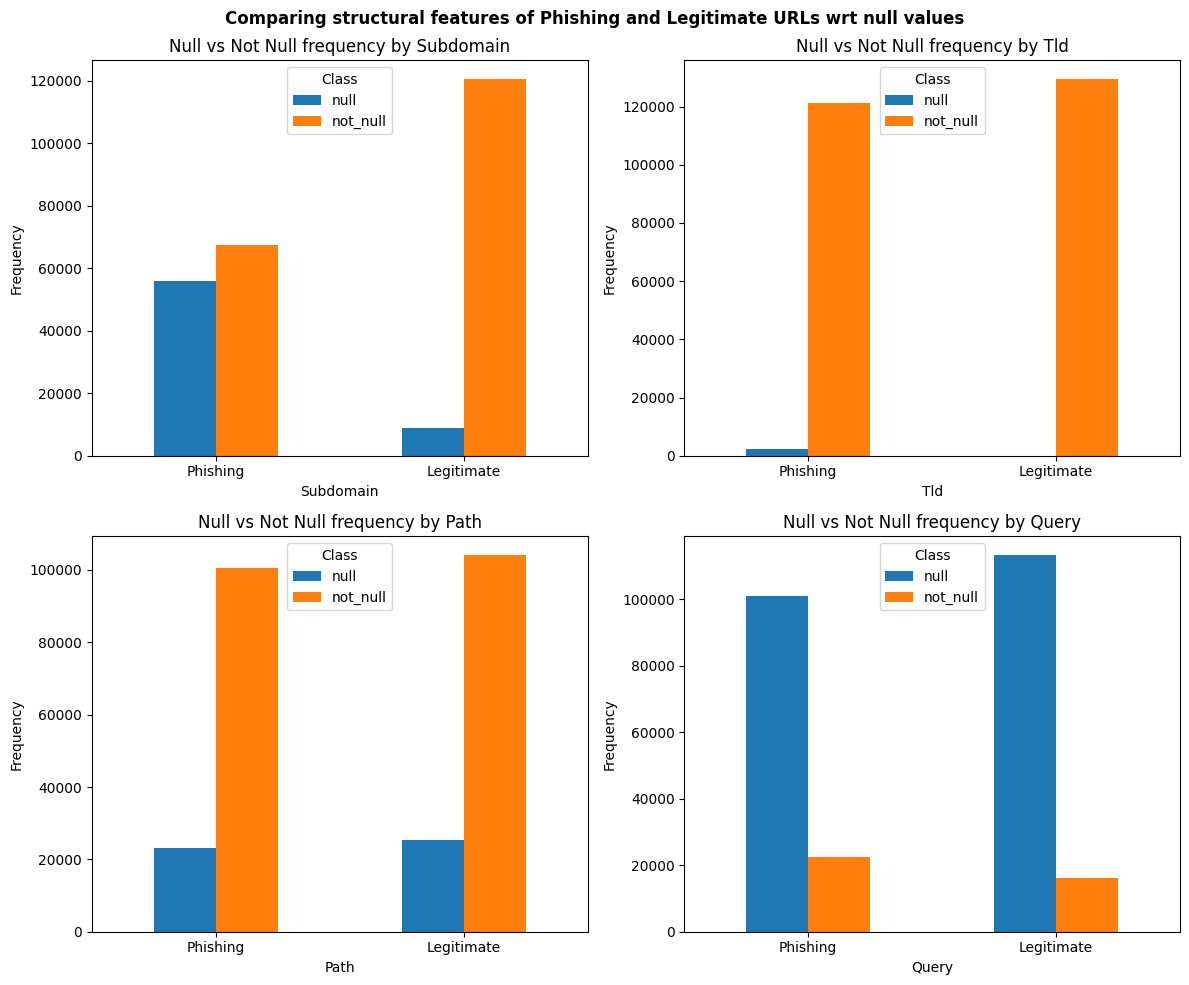

In [27]:
fig,ax = plt.subplots(2,2,figsize=(12,10))

plt.suptitle("Comparing structural features of Phishing and Legitimate URLs wrt null values",weight='bold')
plot_null_vs_notnull('subdomain',ax[0,0])
plot_null_vs_notnull('tld',ax[0,1])
plot_null_vs_notnull('path',ax[1,0])
plot_null_vs_notnull('query',ax[1,1])
plt.tight_layout()

**_Insights_**
- Phishing URLs have a large number of missing subdomains, compared to legitimate URLs.
- Null TLDs are extremly rare in both the URL types.
- Both classes have primarily non null paths.
- Phishing URLs have more Null queries than legitimate URLs. Legitimate URLs use query parameters more often.

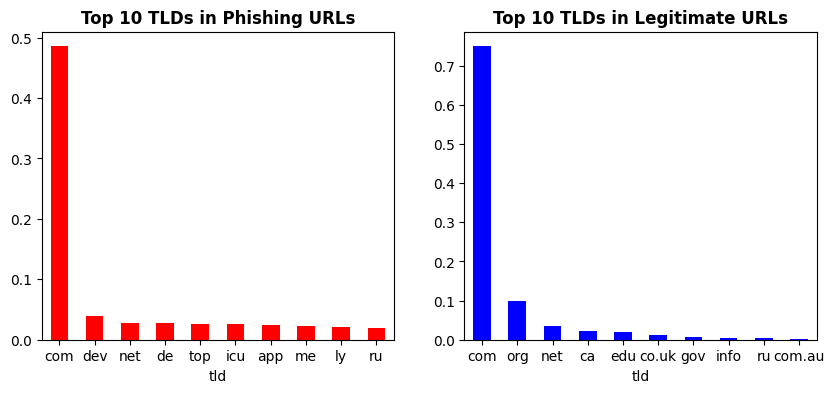

In [28]:
# Top 10 TLDs in URLs wrt label
fig,ax = plt.subplots(1,2,figsize=(10,4))

url_components_df.loc[url_components_df['label'] == 'phishing','tld'].value_counts(normalize=True).nlargest(10).plot(kind='bar',color='red',rot=0,ax=ax[0])
ax[0].set_title('Top 10 TLDs in Phishing URLs',weight='bold')

url_components_df.loc[url_components_df['label'] == 'legitimate','tld'].value_counts(normalize=True).nlargest(10).plot(kind='bar',color='blue',rot=0,ax=ax[1])
ax[1].set_title('Top 10 TLDs in Legitimate URLs',weight='bold')

plt.show()

**_Insights_**
- In Phishing URL TLD pattern, .com dominates heavily because
    - It is globally recognized and trusted.
    - Domain registration is cheap
    - It helps phishing URLs look more legitimate.
- Other phishing TLDs: .com, .dev, .net, .de, .top, .icu, .app are low-cost TLDs and commonly used for spam/malicious activities.
- Phishing attackers show a strong preference for cheap, easily obtainable TLDs to generate domains.
- Legitimate TLDs are also dominated by .com but has significant appearences of .org, .net, .ca, .edu and are almost not cheap TLDs.
- Legitimate URLs concentrate around reputable TLDs.

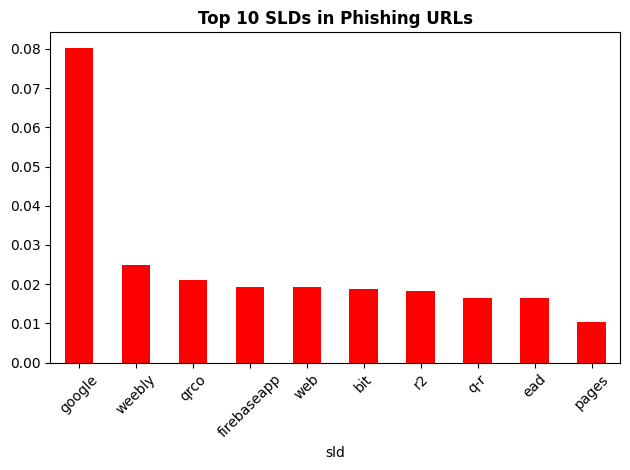

In [29]:
# Top 10 SLDs in Phishing URLs
url_components_df.loc[url_components_df['label'] == 'phishing','sld'].value_counts(normalize=True).nlargest(10).plot(kind='bar',color='red',rot=45)
plt.title('Top 10 SLDs in Phishing URLs',weight='bold')
plt.tight_layout()

**_Insights_**
- The top SLD used in Phishing URLs is google and other commonly used SLDs are weebly, qrco, firebaseapp, web, bit
    - weebly is used for free hosting
    - qrco, bit are short-link services
    - firebaseapp is a free hosting platform
- Phishing URLs often use free hosting platforms and URL shorteners.

2. **Length Features Data**

In [30]:
len_features_df.head()

,url,label,url_len,domain_len,path_len,query_len,url_depth,subdomain_count
0,https://adoaeco.cn/Loggin,phishing,25,10,6,0,1,1
1,https://gageparkhighschool.com/QTeuUe,phishing,37,22,6,0,1,1
2,https://wwnox.miraltek.cfd/qzxn3,phishing,32,18,5,0,1,1
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,46,14,0,22,1,1
4,https://yqcjl.miraltek.cfd/plis0,phishing,32,18,5,0,1,1


In [31]:
len_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              253051 non-null  object
 1   label            253051 non-null  object
 2   url_len          253051 non-null  int64 
 3   domain_len       253051 non-null  int64 
 4   path_len         253051 non-null  int64 
 5   query_len        253051 non-null  int64 
 6   url_depth        253051 non-null  int64 
 7   subdomain_count  253051 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 15.4+ MB


In [32]:
len_features_df.describe()

,url_len,domain_len,path_len,query_len,url_depth,subdomain_count
count,253051.000000,253051.000000,253051.000000,253051.000000,253051.000000,253051.000000
mean,60.012650,19.571399,22.785901,7.404634,1.966351,1.190064
std,88.078854,9.620994,26.711086,38.965137,1.708119,0.521252
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,14.000000,6.000000,0.000000,1.000000,1.000000
50%,49.000000,18.000000,15.000000,0.000000,2.000000,1.000000
75%,69.000000,23.000000,31.000000,0.000000,3.000000,1.000000
max,25523.000000,240.000000,1895.000000,7771.000000,78.000000,19.000000


Do Distributions of Length features provide any inference?

In [33]:
def plot_len_distribution(col,ax1,ax2):
    col_name = (col.split('_')[0] + ' length').title()
    sns.histplot(data=len_features_df.loc[len_features_df['label'] == 'legitimate'],x=col,bins=range(0,250,10),ax=ax1,color='blue')
    ax1.set_title(f'Distribution of {col_name} feature of Legitimate URLs',weight='bold')
    ax1.set_xlabel(col_name)

    sns.histplot(data=len_features_df.loc[len_features_df['label'] == 'phishing'],x=col,bins=[i for i in range(0,250,10)],ax=ax2,color='red')
    ax2.set_title(f'Distribution of {col_name} feature of Phishing URLs',weight='bold')
    ax2.set_xlabel(col_name)

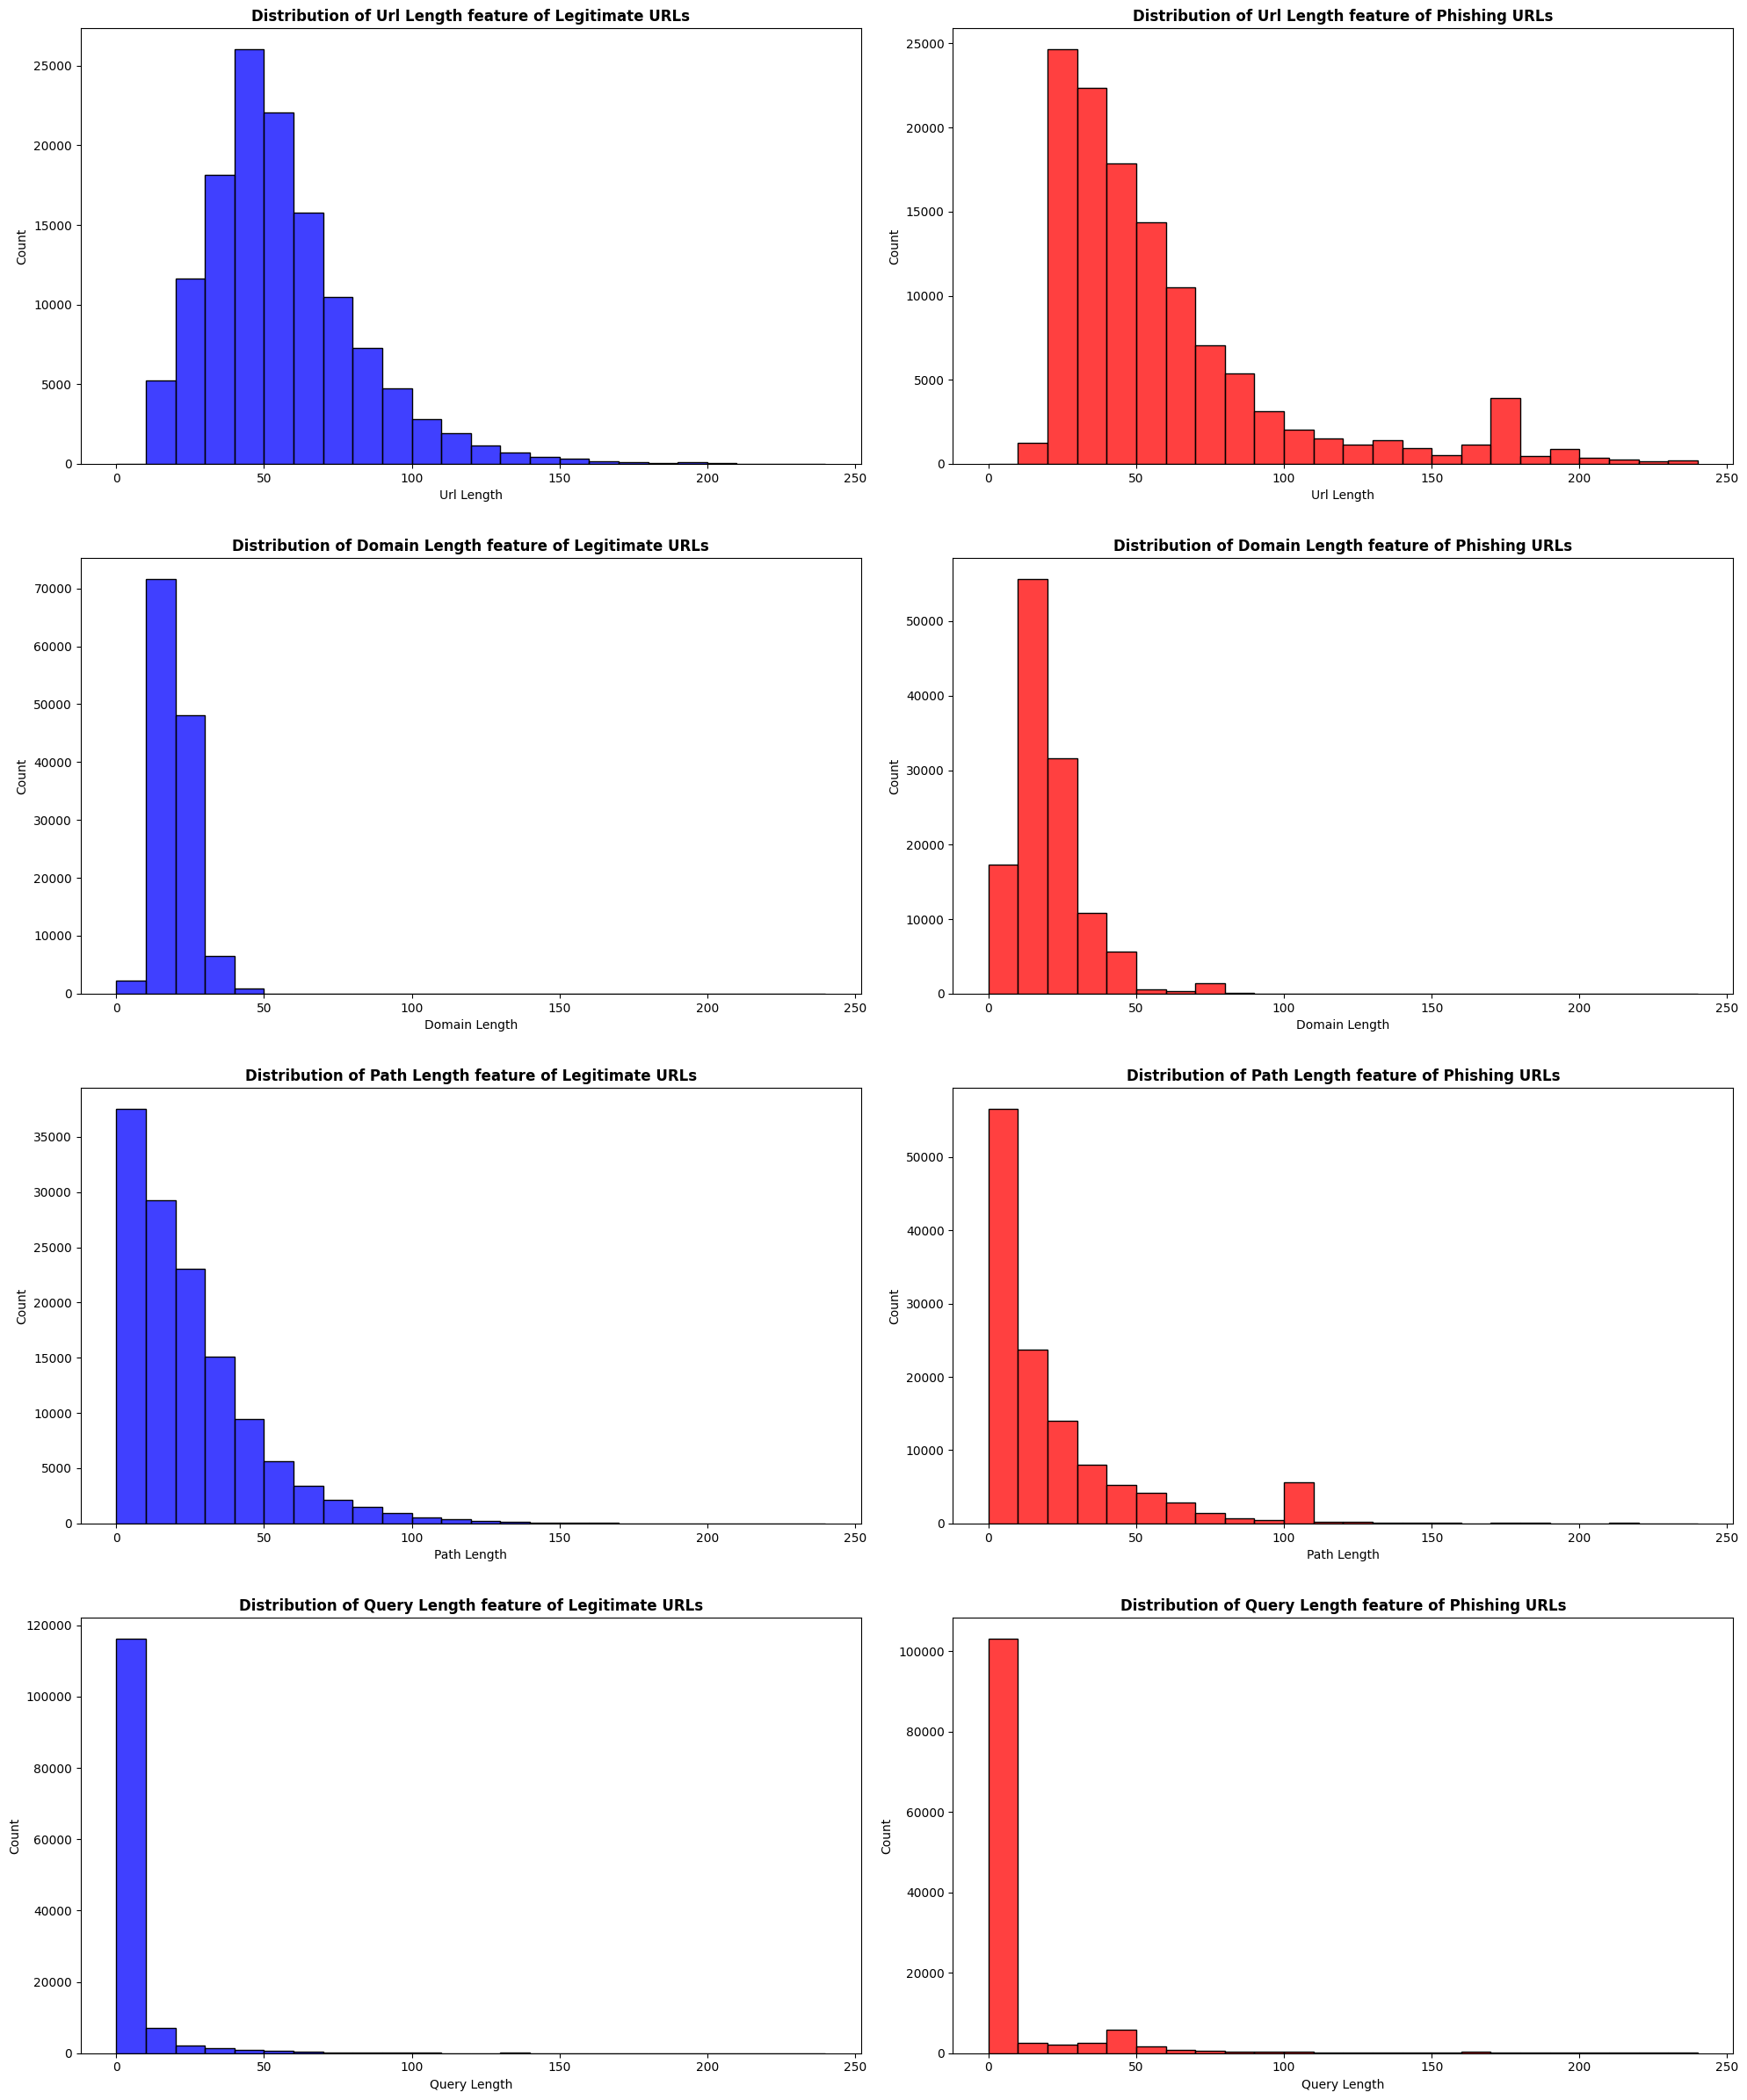

In [34]:
fig,ax = plt.subplots(4,2,figsize=(20,24))

plot_len_distribution('url_len',ax[0,0],ax[0,1])
plot_len_distribution('domain_len',ax[1,0],ax[1,1])
plot_len_distribution('path_len',ax[2,0],ax[2,1])
plot_len_distribution('query_len',ax[3,0],ax[3,1])

plt.tight_layout(h_pad=3)

**_Insights_**
- Phishing URLs show a much longer tail than legitimate URLs, indicating attackers intentionally use longer structures.
- Phishing Domains are either short or long compared to legitimate domains, showing tricks like tiny redirect domains.
- Phishing URLs frequently contain very long and complex paths, suggesting randomization or multi-layered fake directory structures to escape from filters.
- Phishing URLs exhibit more long query strings than legitimate URLs, meaning attackers embed misleading parameters, tokens or encoded data.
- Overall, Phishing URLs have more right-skewed length distributions compared to Legitimate URLs.

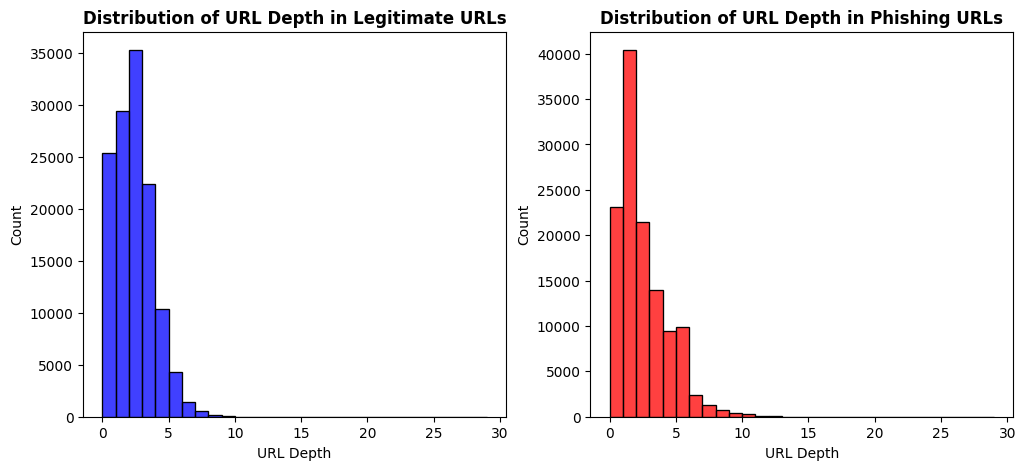

In [35]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=len_features_df[len_features_df['label'] == 'legitimate'],x='url_depth',bins=range(30),ax=ax[0],color='blue')
ax[0].set_title('Distribution of URL Depth in Legitimate URLs',weight='bold')
ax[0].set_xlabel('URL Depth')

sns.histplot(data=len_features_df[len_features_df['label'] == 'phishing'],x='url_depth',bins=range(30),ax=ax[1],color='red')
ax[1].set_title('Distribution of URL Depth in Phishing URLs',weight='bold')
ax[1].set_xlabel('URL Depth')

plt.show()

**Insights**
- Phishing URLs exhibit higher frequency of deeper directory levels than legitimate URLs, indicating attackers artificially extend URL depth to create complexity and malicious intent.

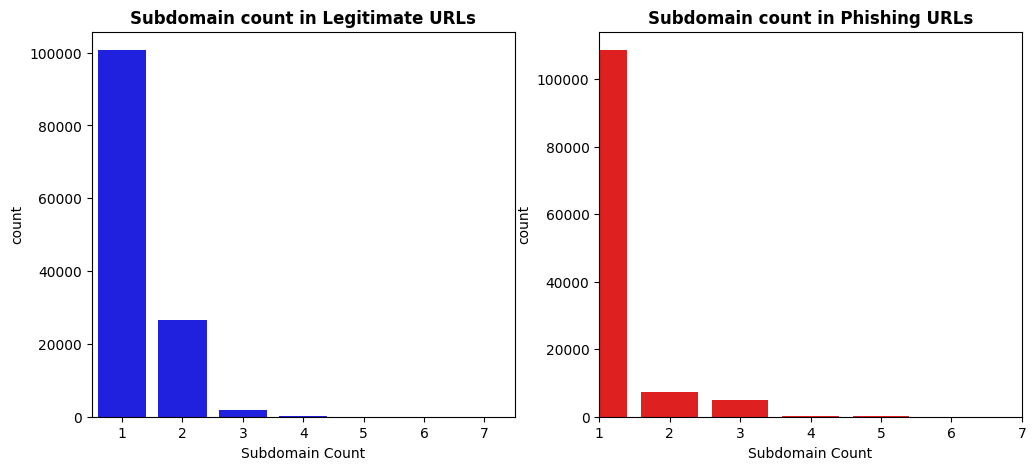

In [36]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.countplot(data=len_features_df[len_features_df['label'] == 'legitimate'],x='subdomain_count',ax=ax[0],color='blue',order=range(1,8))
ax[0].set_title('Subdomain count in Legitimate URLs',weight='bold')
ax[0].set_xlabel('Subdomain Count')

sns.countplot(data=len_features_df[len_features_df['label'] == 'phishing'],x='subdomain_count',ax=ax[1],color='red',order=range(1,8))
ax[1].set_title('Subdomain count in Phishing URLs',weight='bold')
ax[1].set_xlabel('Subdomain Count')
ax[1].set_xlim(0,6)

plt.show()

**_Insights_**
- Phishing URLs show a higher proportion of URLs with multiple subdomains compared to legitimate ones.

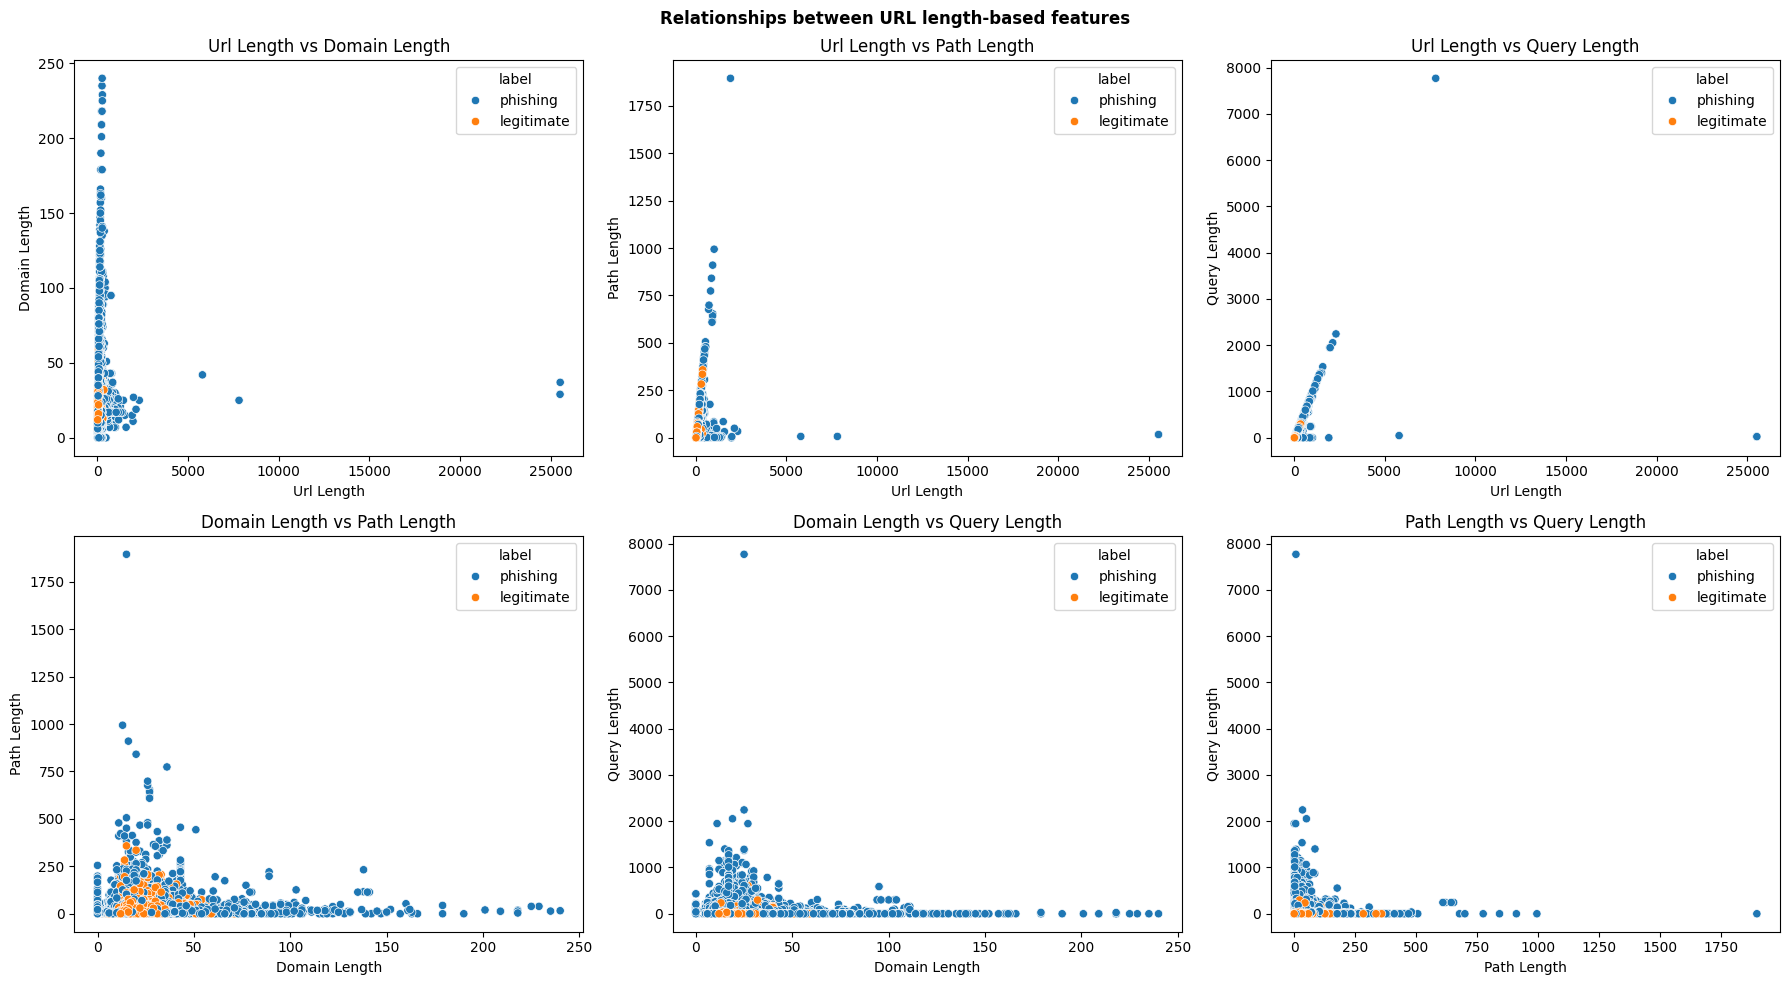

In [37]:
cols = len_features_df.columns[2:6]
pairs = [(i,j) for i in range(len(cols)) for j in range(i+1,len(cols))]

fig,axes = plt.subplots(2,3,figsize=(18,10))
axes = axes.flatten()

for idx,(i,j) in enumerate(pairs):
    ax = axes[idx]
    col1_name = (cols[i].split('_')[0] + ' length').title()
    col2_name = (cols[j].split('_')[0] + ' length').title()
    sns.scatterplot(data=len_features_df,x=cols[i],y=cols[j],hue='label',ax=ax)
    ax.set_title(f'{col1_name} vs {col2_name}')
    ax.set_xlabel(col1_name)
    ax.set_ylabel(col2_name)

plt.suptitle('Relationships between URL length-based features',weight='bold')
plt.tight_layout()
plt.show()

**_Insights_**
- A positive correlation is observed between URL Length & Path Length, indicating that longer URLs are result of increase in path length, especially in phishing URLs.
- Postive correlation is also observed between URL Length & Path Length, meaning URLs tend to become longer when the query part increases.
- For the remaining feature pairs, no clear relationship is observed, as the points are scattered without any pattern.

3. **Domain Features Data**

In [38]:
domain_features_df.head()

,url,label,tld,tld_len,url_has_ipv4,url_has_port
0,https://adoaeco.cn/Loggin,phishing,cn,2,False,False
1,https://gageparkhighschool.com/QTeuUe,phishing,com,3,False,False
2,https://wwnox.miraltek.cfd/qzxn3,phishing,cfd,3,False,False
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,com,3,False,False
4,https://yqcjl.miraltek.cfd/plis0,phishing,cfd,3,False,False


In [39]:
domain_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   url           253051 non-null  object
 1   label         253051 non-null  object
 2   tld           250616 non-null  object
 3   tld_len       253051 non-null  int64 
 4   url_has_ipv4  253051 non-null  bool  
 5   url_has_port  253051 non-null  bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 8.2+ MB


In [40]:
domain_features_df.iloc[:,2:].select_dtypes(['object','bool']).describe()

,tld,url_has_ipv4,url_has_port
count,250616,253051,253051
unique,857,2,2
top,com,False,False
freq,155806,250768,252092


In [41]:
domain_features_df.select_dtypes('number').describe()

,tld_len
count,253051.000000
mean,2.983264
std,0.793433
min,0.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,18.000000


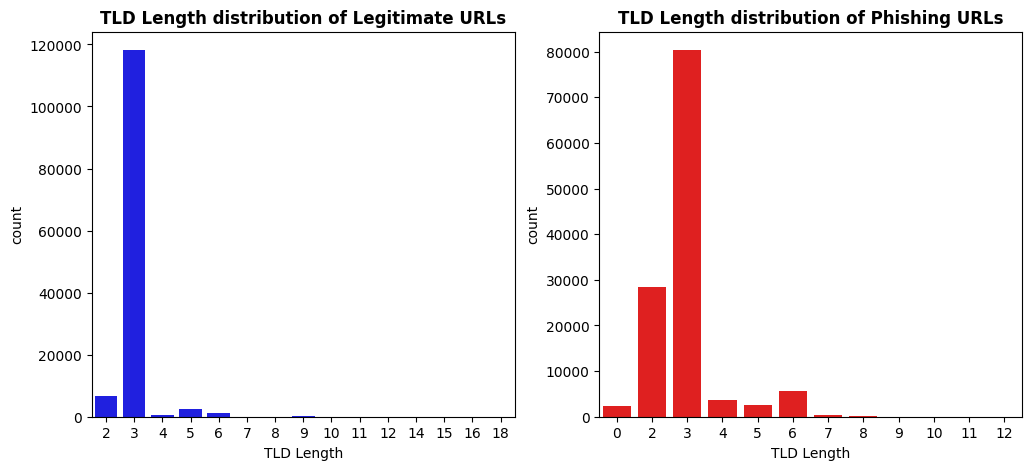

In [42]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.countplot(data=domain_features_df[domain_features_df['label'] == 'legitimate'],x='tld_len',ax=ax[0],color='blue')
ax[0].set_title('TLD Length distribution of Legitimate URLs',weight='bold')
ax[0].set_xlabel('TLD Length')

sns.countplot(data=domain_features_df[domain_features_df['label'] == 'phishing'],x='tld_len',ax=ax[1],color='red')
ax[1].set_title('TLD Length distribution of Phishing URLs',weight='bold')
ax[1].set_xlabel('TLD Length')

plt.show()

**_Insights_**
- Phishing URLs show more variation in TLD Length than Legitimate URLs, meaning attackers frequently use unusual or longer TLDs to appear different.

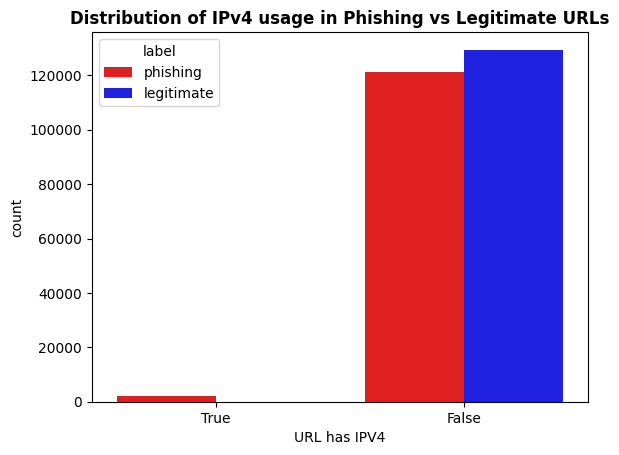

In [43]:
sns.countplot(data=domain_features_df,x='url_has_ipv4',hue='label',palette=['red','blue'],order=[True,False])
plt.title('Distribution of IPv4 usage in Phishing vs Legitimate URLs',weight='bold')
plt.xlabel('URL has IPV4');

**_Insights_**
- Both phishing and legitimate URLs rarely use IPv4 address, but phishing URLs use IP-based addresses slightly more often, showing that attackers sometimes avoid domain names to their identity.

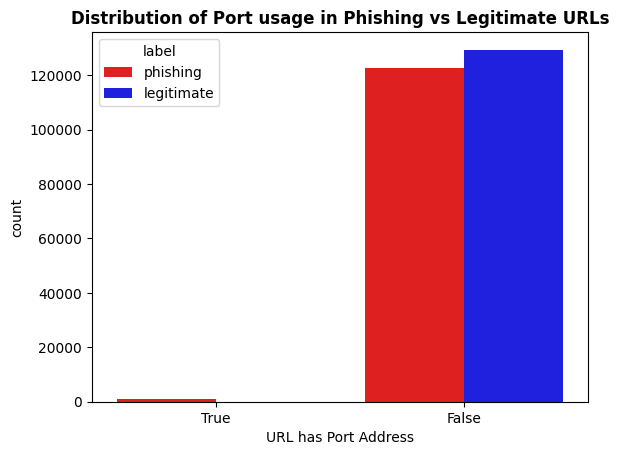

In [44]:
sns.countplot(data=domain_features_df,x='url_has_port',hue='label',palette=['red','blue'],order=[True,False])
plt.title('Distribution of Port usage in Phishing vs Legitimate URLs',weight='bold')
plt.xlabel('URL has Port Address');

**_Insights_**
- Phishing URLs use custom port numbers slightly more often than legitimate URLs, but overall port usage is rare in both classes.

4. **SLD Features data**

In [45]:
sld_features_df.head()

,url,label,sld,sld_len,sld_has_digit,sld_has_hyphen,sld_token_count
0,https://adoaeco.cn/Loggin,phishing,adoaeco,7,False,False,1
1,https://gageparkhighschool.com/QTeuUe,phishing,gageparkhighschool,18,False,False,1
2,https://wwnox.miraltek.cfd/qzxn3,phishing,miraltek,8,False,False,1
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,halfetitur,10,False,False,1
4,https://yqcjl.miraltek.cfd/plis0,phishing,miraltek,8,False,False,1


In [46]:
sld_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              253051 non-null  object
 1   label            253051 non-null  object
 2   sld              250765 non-null  object
 3   sld_len          253051 non-null  int64 
 4   sld_has_digit    253051 non-null  bool  
 5   sld_has_hyphen   253051 non-null  bool  
 6   sld_token_count  253051 non-null  int64 
dtypes: bool(2), int64(2), object(3)
memory usage: 10.1+ MB


In [47]:
sld_features_df[['sld','sld_has_digit','sld_has_hyphen']].describe()

,sld,sld_has_digit,sld_has_hyphen
count,250765,253051,253051
unique,82183,2,2
top,google,False,False
freq,10071,237234,235695


In [48]:
sld_features_df['sld_token_count'].describe()

count    253051.000000
mean          1.080442
std           0.322486
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: sld_token_count, dtype: float64

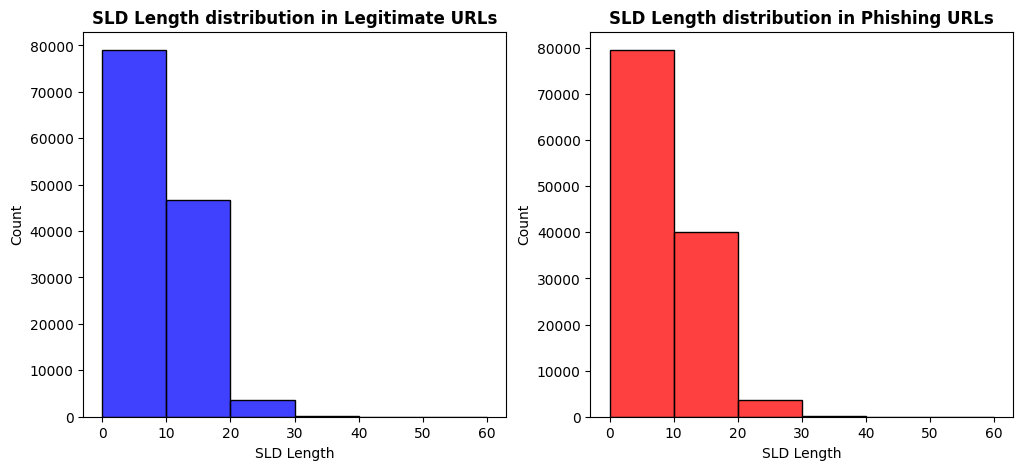

In [49]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=sld_features_df[sld_features_df['label'] == 'legitimate'],x='sld_len',bins=range(0,70,10),ax=ax[0],color='blue')
ax[0].set_title('SLD Length distribution in Legitimate URLs',weight='bold')
ax[0].set_xlabel('SLD Length')

sns.histplot(data=sld_features_df[sld_features_df['label'] == 'phishing'],x='sld_len',bins=range(0,70,10),ax=ax[1],color='red')
ax[1].set_title('SLD Length distribution in Phishing URLs',weight='bold')
ax[1].set_xlabel('SLD Length')

plt.show()

**_Insights_**
- The SLD length distribution for Phishing & Legitimate URLs looks almost identical, meaning SLD length does not help in distinguishing phishing URLs from legitimate ones.

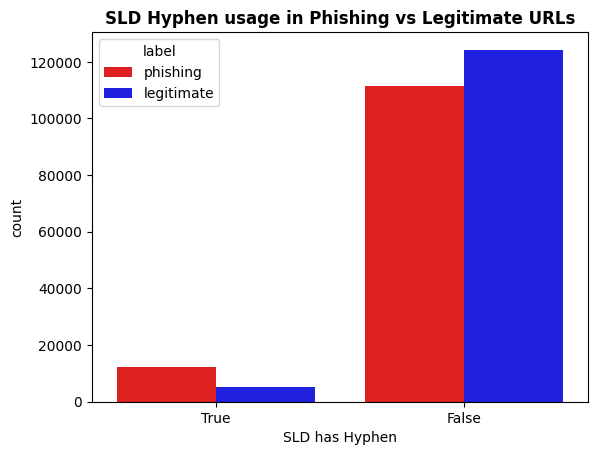

In [50]:
sns.countplot(data=sld_features_df,x='sld_has_hyphen',hue='label',palette=['red','blue'],order=[True,False])
plt.title('SLD Hyphen usage in Phishing vs Legitimate URLs',weight='bold')
plt.xlabel('SLD has Hyphen');

**_Insights_**
- Phishing URLs use hyphens in SLD much more often than legitimate URLs, showing that attackers frequently add hyphens in Phishing URLs.

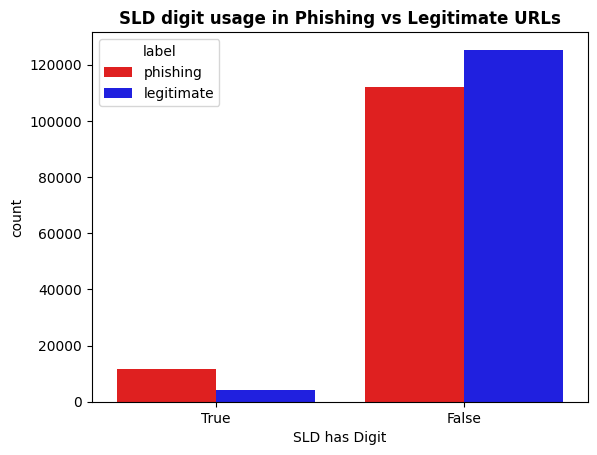

In [51]:
sns.countplot(data=sld_features_df,x='sld_has_digit',hue='label',palette=['red','blue'],order=[True,False])
plt.title('SLD digit usage in Phishing vs Legitimate URLs',weight='bold')
plt.xlabel('SLD has Digit');

**_Insights_**
- Phishign URLs include digits in the SLD more often than legitimate URLs, showing that attackers commonly insert numbers.

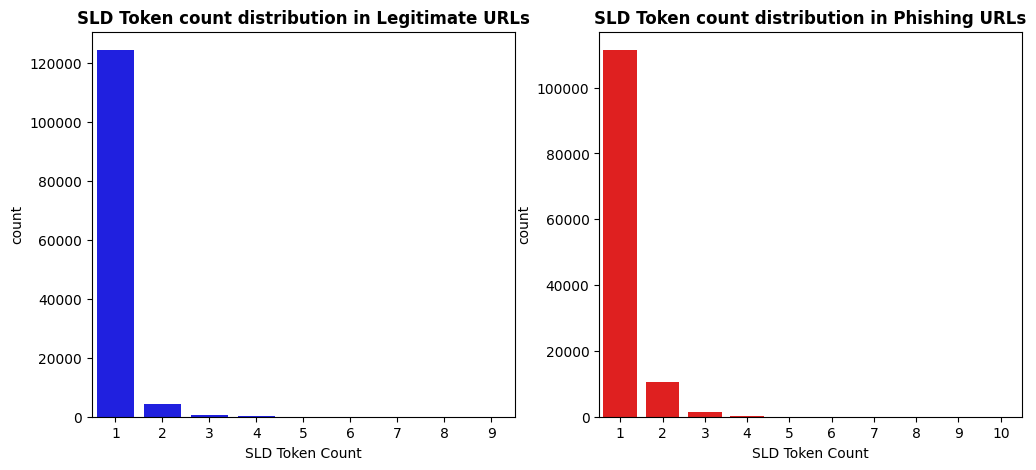

In [52]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x=sld_features_df.loc[sld_features_df['label'] == 'legitimate','sld_token_count'],ax=ax[0],color='blue')
ax[0].set_title('SLD Token count distribution in Legitimate URLs',weight='bold')
ax[0].set_xlabel('SLD Token Count')

sns.countplot(x=sld_features_df.loc[sld_features_df['label'] == 'phishing','sld_token_count'],ax=ax[1],color='red')
ax[1].set_title('SLD Token count distribution in Phishing URLs',weight='bold')
ax[1].set_xlabel('SLD Token Count');

**_Insights_**
- Phishing URLs show slightly higher SLD token counts than legitimate URLs, indicating attackers split the SLD into multiple parts to imitate brand-like patterns.

5. **Character Features Data**

In [53]:
char_feature_df.head()

,url,label,dot_count_domain,hyphen_count_domain_path,underscore_count_path_query,slash_count,digit_count,alphabet_count,spl_char_count
0,https://adoaeco.cn/Loggin,phishing,1,0,0,3,0,20,5
1,https://gageparkhighschool.com/QTeuUe,phishing,1,0,0,3,0,32,5
2,https://wwnox.miraltek.cfd/qzxn3,phishing,2,0,0,3,1,25,6
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,1,0,0,3,4,35,7
4,https://yqcjl.miraltek.cfd/plis0,phishing,2,0,0,3,1,25,6


In [54]:
char_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   url                          253051 non-null  object
 1   label                        253051 non-null  object
 2   dot_count_domain             253051 non-null  int64 
 3   hyphen_count_domain_path     253051 non-null  int64 
 4   underscore_count_path_query  253051 non-null  int64 
 5   slash_count                  253051 non-null  int64 
 6   digit_count                  253051 non-null  int64 
 7   alphabet_count               253051 non-null  int64 
 8   spl_char_count               253051 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.4+ MB


In [55]:
char_feature_df.describe()

,dot_count_domain,hyphen_count_domain_path,underscore_count_path_query,slash_count,digit_count,alphabet_count,spl_char_count
count,253051.000000,253051.000000,253051.000000,253051.000000,253051.000000,253051.000000,253051.000000
mean,1.978826,0.977724,0.342034,3.974705,4.929271,45.281896,9.801483
std,0.767680,2.133982,1.290949,1.748285,14.863618,72.656038,6.098913
min,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,3.000000
25%,2.000000,0.000000,0.000000,3.000000,0.000000,27.000000,6.000000
50%,2.000000,0.000000,0.000000,4.000000,1.000000,38.000000,8.000000
75%,2.000000,1.000000,0.000000,5.000000,6.000000,52.000000,11.000000
max,20.000000,42.000000,200.000000,118.000000,3413.000000,22021.000000,273.000000


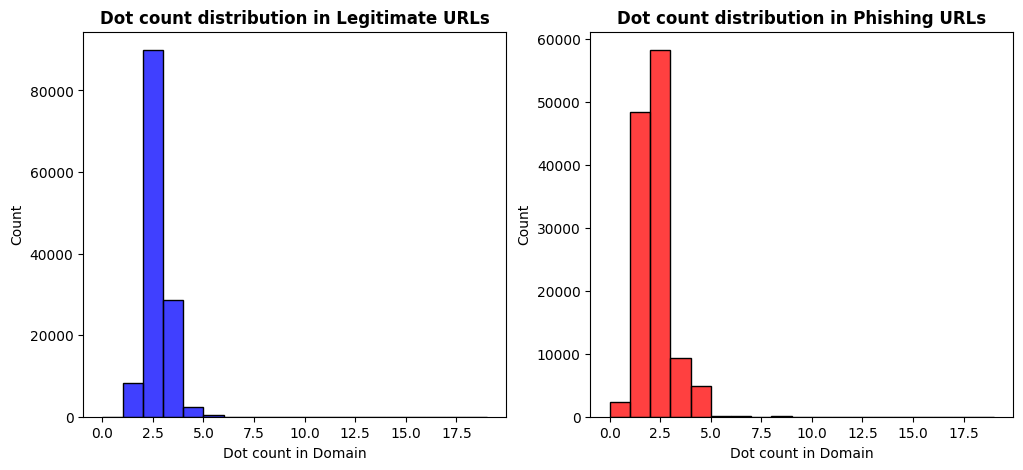

In [56]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='dot_count_domain',color='blue',ax=ax[0],bins=range(0,20))
ax[0].set_title('Dot count distribution in Legitimate URLs',weight='bold')
ax[0].set_xlabel('Dot count in Domain')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='dot_count_domain',color='red',ax=ax[1],bins=range(20))
ax[1].set_title('Dot count distribution in Phishing URLs',weight='bold')
ax[1].set_xlabel('Dot count in Domain')

plt.show()

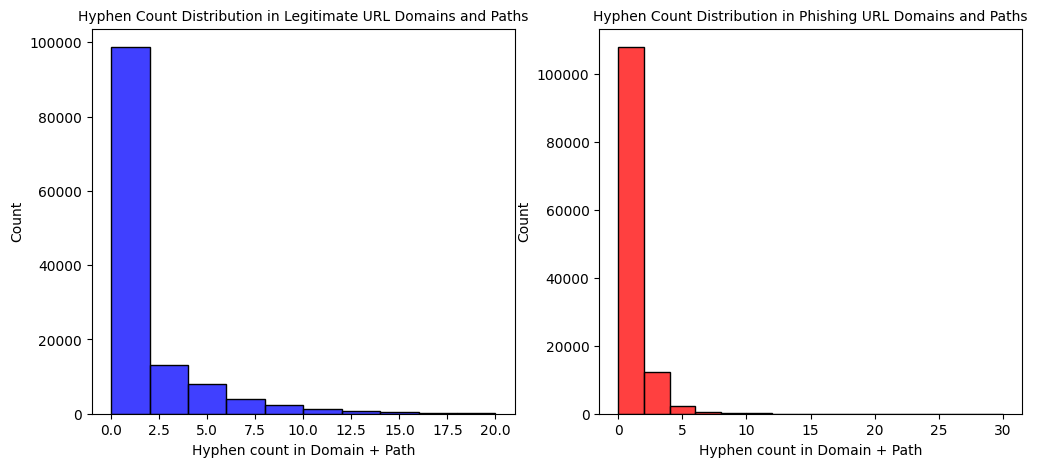

In [57]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='hyphen_count_domain_path',color='blue',ax=ax[0],bins=range(0,22,2))
ax[0].set_title('Hyphen Count Distribution in Legitimate URL Domains and Paths',fontsize=10)
ax[0].set_xlabel('Hyphen count in Domain + Path')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='hyphen_count_domain_path',color='red',ax=ax[1],bins=range(0,32,2))
ax[1].set_title('Hyphen Count Distribution in Phishing URL Domains and Paths',fontsize=10)
ax[1].set_xlabel('Hyphen count in Domain + Path')

plt.show()

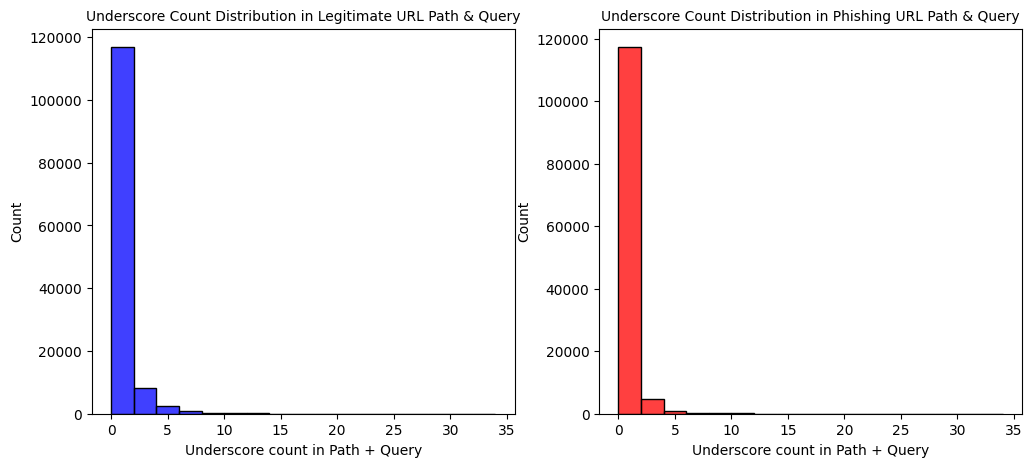

In [58]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='underscore_count_path_query',color='blue',ax=ax[0],bins=range(0,35,2))
ax[0].set_title('Underscore Count Distribution in Legitimate URL Path & Query',fontsize=10)
ax[0].set_xlabel('Underscore count in Path + Query')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='underscore_count_path_query',color='red',ax=ax[1],bins=range(0,35,2))
ax[1].set_title('Underscore Count Distribution in Phishing URL Path & Query',fontsize=10)
ax[1].set_xlabel('Underscore count in Path + Query')

plt.show()

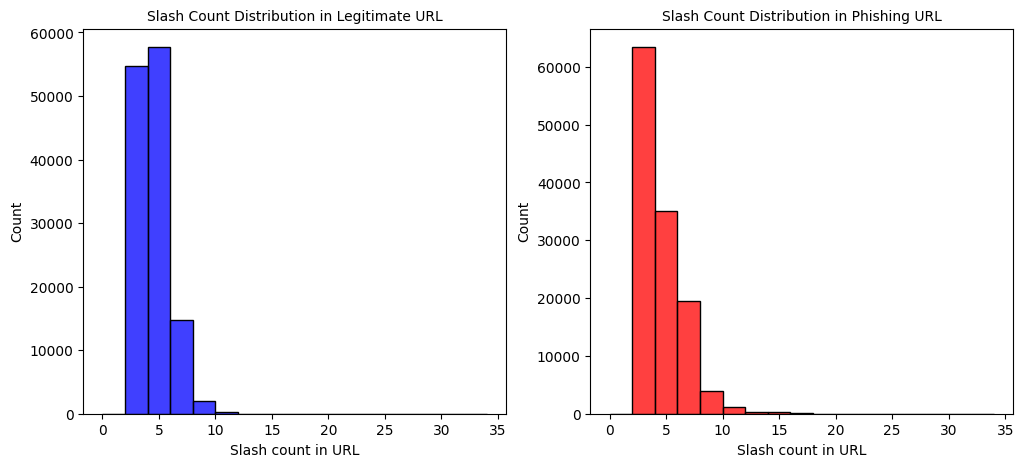

In [59]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='slash_count',color='blue',ax=ax[0],bins=range(0,35,2))
ax[0].set_title('Slash Count Distribution in Legitimate URL',fontsize=10)
ax[0].set_xlabel('Slash count in URL')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='slash_count',color='red',ax=ax[1],bins=range(0,35,2))
ax[1].set_title('Slash Count Distribution in Phishing URL',fontsize=10)
ax[1].set_xlabel('Slash count in URL')

plt.show()

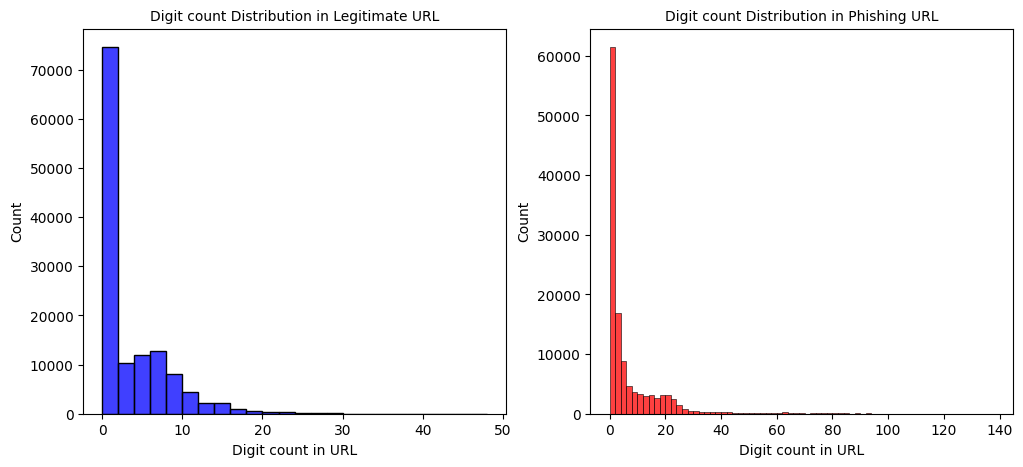

In [60]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='digit_count',color='blue',ax=ax[0],bins=range(0,50,2))
ax[0].set_title('Digit count Distribution in Legitimate URL',fontsize=10)
ax[0].set_xlabel('Digit count in URL')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='digit_count',color='red',ax=ax[1],bins=range(0,140,2))
ax[1].set_title('Digit count Distribution in Phishing URL',fontsize=10)
ax[1].set_xlabel('Digit count in URL')

plt.show()

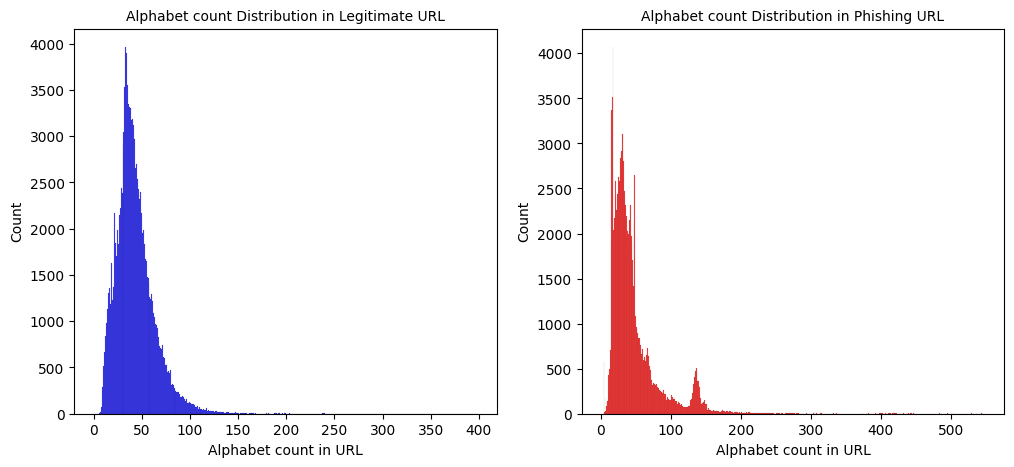

In [61]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='alphabet_count',color='blue',ax=ax[0],bins=range(0,400))
ax[0].set_title('Alphabet count Distribution in Legitimate URL',fontsize=10)
ax[0].set_xlabel('Alphabet count in URL')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='alphabet_count',color='red',ax=ax[1],bins=range(0,550))
ax[1].set_title('Alphabet count Distribution in Phishing URL',fontsize=10)
ax[1].set_xlabel('Alphabet count in URL')

plt.show()

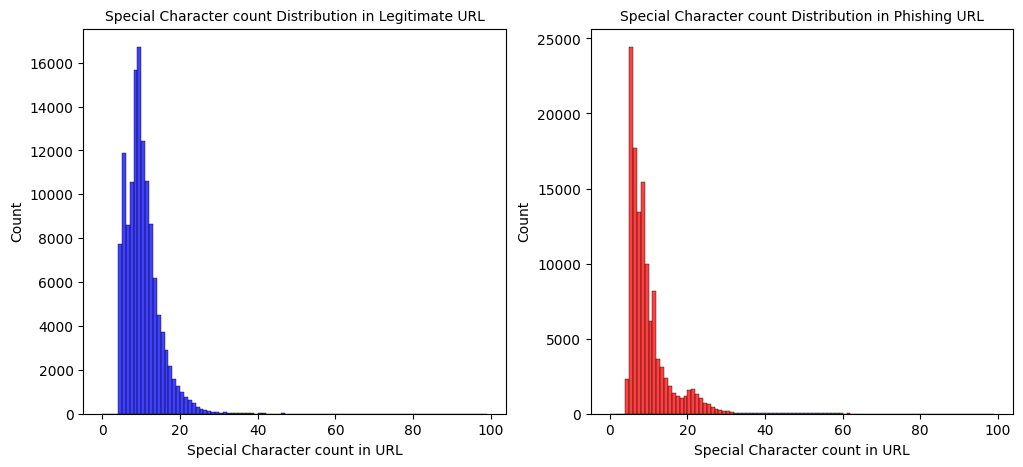

In [62]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'legitimate'],x='spl_char_count',color='blue',ax=ax[0],bins=range(0,100))
ax[0].set_title('Special Character count Distribution in Legitimate URL',fontsize=10)
ax[0].set_xlabel('Special Character count in URL')

sns.histplot(data=char_feature_df[char_feature_df['label'] == 'phishing'],x='spl_char_count',color='red',ax=ax[1],bins=range(0,100))
ax[1].set_title('Special Character count Distribution in Phishing URL',fontsize=10)
ax[1].set_xlabel('Special Character count in URL')

plt.show()

***Insights***
- Phishing URLs show slightly higher dot count in the domain, meaning attackers often insert more subdomain levels to mislead users.
- Legitimate URLs have more hyphens overall than Phishing URLs. 
- There is not much difference between Underscore count distribution of Phishing & Legitimate URLs.
- Phishing URLs contain more slashes, meaning attackers use deeper directory structures to make URLs appear longer and more confusing.
- Digit usage is much higher in phishing URLs, showing attackers frequently add numbers to create random-looking URLs or mimic versioning.
- Phishing URLs show a wider range of alphabet counts, suggesting more variation and randomness in the textual components.
- Phishing URLs contain more special characters, indicating attackers use symbols to construct complex URL structures.

6. **Entropy Features Data**

In [63]:
entropy_feature_df.head()

,url,label,url_entropy,domain_entropy,sld_entropy,path_entropy
0,https://adoaeco.cn/Loggin,phishing,3.863465,2.721928,2.235926,2.521641
1,https://gageparkhighschool.com/QTeuUe,phishing,4.208925,3.629220,3.419382,2.521641
2,https://wwnox.miraltek.cfd/qzxn3,phishing,4.452820,3.947703,3.000000,2.584963
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,4.760096,3.664498,3.121928,-0.000000
4,https://yqcjl.miraltek.cfd/plis0,phishing,4.241729,3.836592,3.000000,2.584963


In [64]:
entropy_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   url             253051 non-null  object 
 1   label           253051 non-null  object 
 2   url_entropy     253051 non-null  float64
 3   domain_entropy  253051 non-null  float64
 4   sld_entropy     253051 non-null  float64
 5   path_entropy    253051 non-null  float64
dtypes: float64(4), object(2)
memory usage: 11.6+ MB


In [65]:
entropy_feature_df.describe()

,url_entropy,domain_entropy,sld_entropy,path_entropy
count,253051.000000,253051.000000,253051.000000,253051.000000
mean,4.308564,3.351710,2.585179,2.922301
std,0.413632,0.520006,0.670774,1.623453
min,1.339504,0.000000,0.000000,0.000000
25%,4.050982,3.139572,2.251629,2.584963
50%,4.256513,3.391893,2.721928,3.470176
75%,4.525493,3.656198,3.084963,4.047280
max,6.048781,5.077831,4.509884,5.969537


<Axes: >

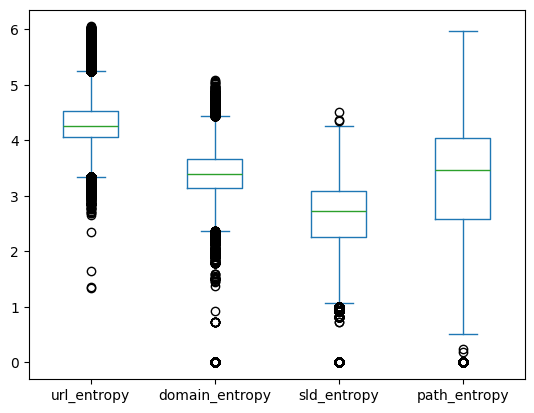

In [66]:
entropy_feature_df.select_dtypes('number').plot(kind='box')

***Insights***
- URL Entropy shows a tight distribution with low variation, meaning most URLs have similar overall randomness, while path entropy shows higher variation, meaning the path part of the URLs varies widely in complexity and randomness.

In [67]:
def plot_entropy_distribution(col,ax1,ax2):
    col_name = (' '.join(col.split('_'))).title()
    
    sns.histplot(data=entropy_feature_df.loc[entropy_feature_df['label'] == 'legitimate'],x=col,color='blue',ax=ax1,kde=True)
    ax1.set_title(f'{col_name} distribution of Legitimate URLs',weight='bold')
    ax1.set_xlabel(col_name)

    sns.histplot(data=entropy_feature_df.loc[entropy_feature_df['label'] == 'phishing'],x=col,color='red',ax=ax2,kde=True)
    ax2.set_title(f'{col_name} distribution of Phishing URLs',weight='bold')
    ax2.set_xlabel(col_name)

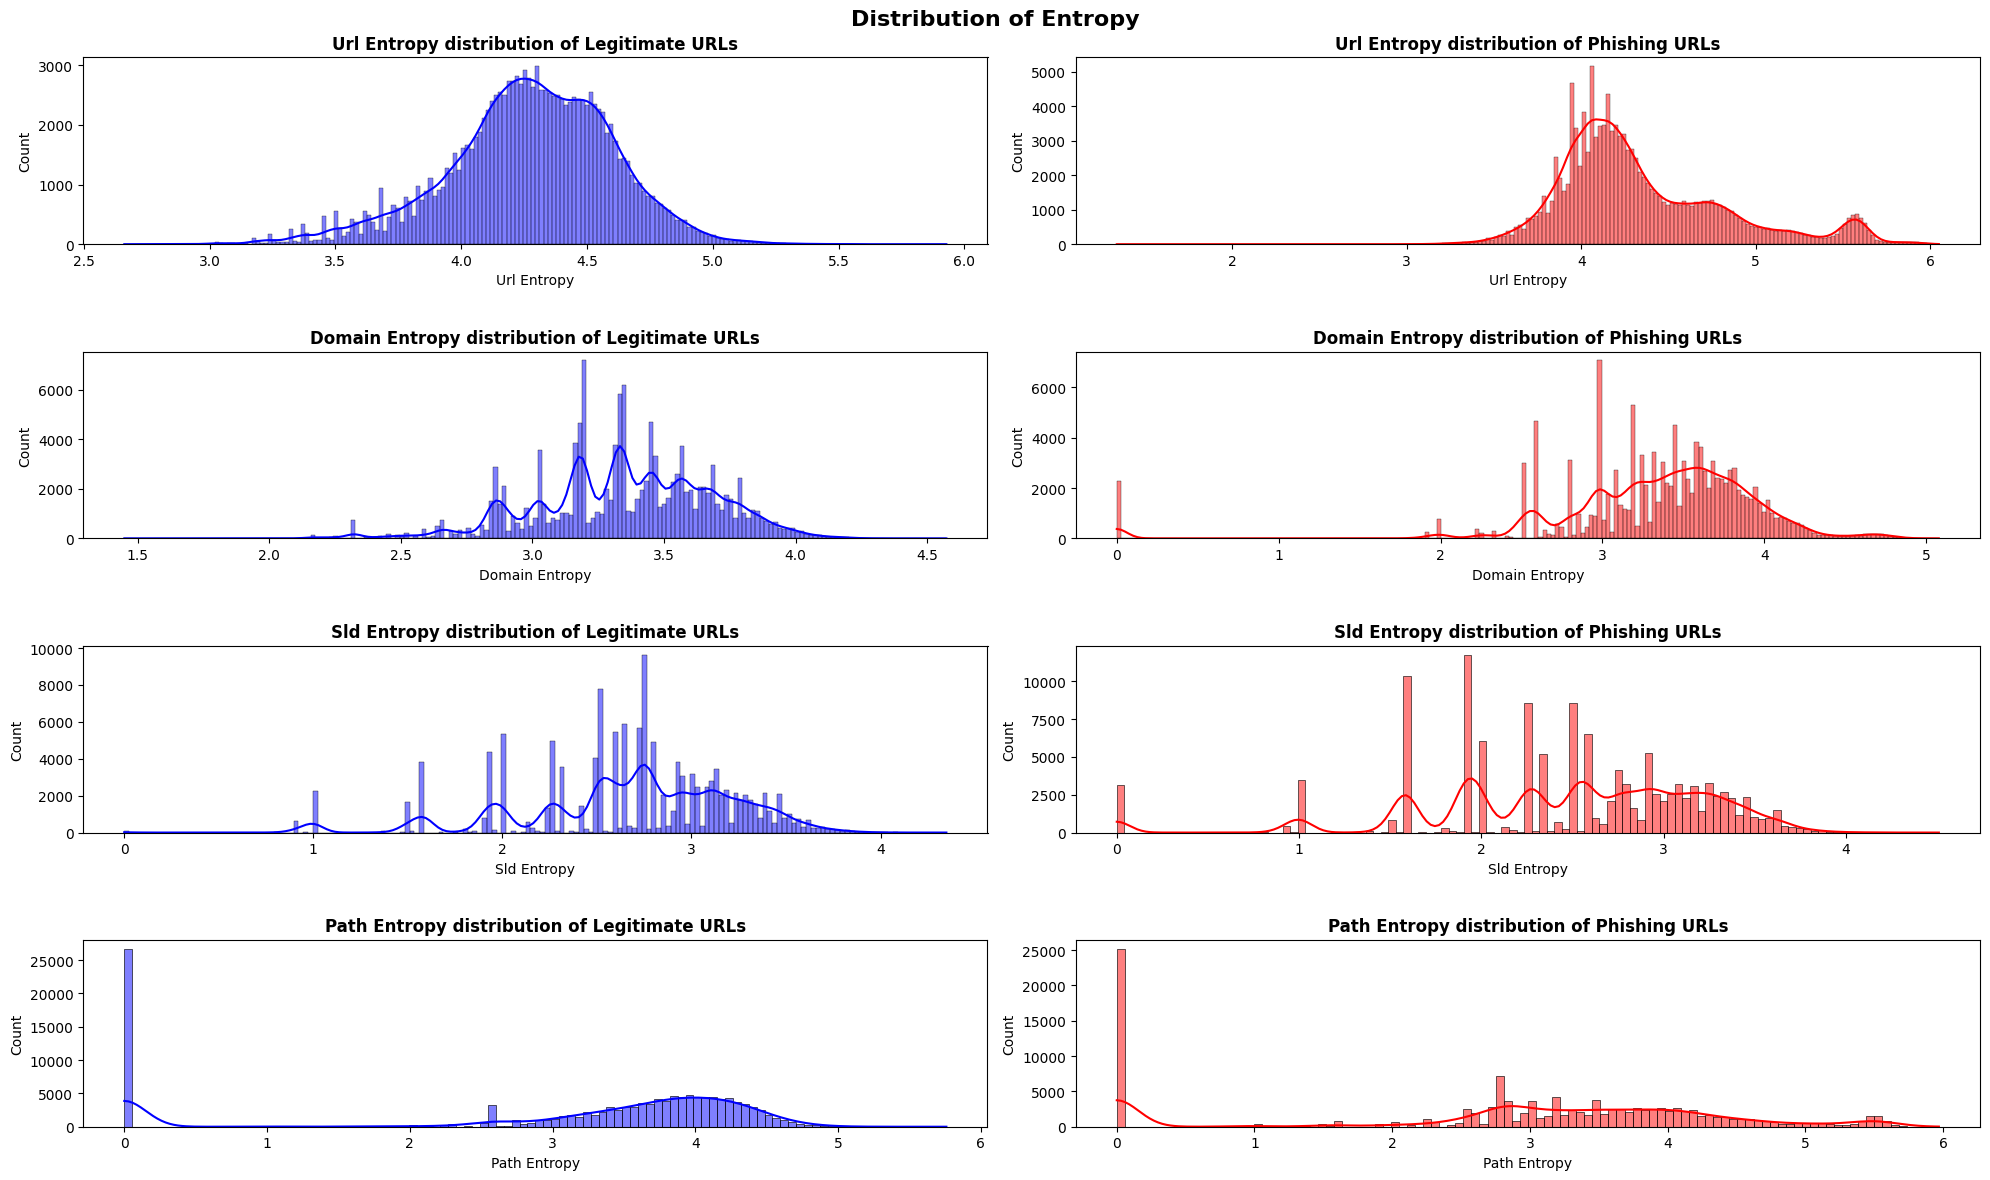

In [68]:
fig,ax = plt.subplots(4,2,figsize=(20,12))

plt.suptitle('Distribution of Entropy',fontsize=16,weight='bold')

plot_entropy_distribution('url_entropy',ax[0,0],ax[0,1])
plot_entropy_distribution('domain_entropy',ax[1,0],ax[1,1])
plot_entropy_distribution('sld_entropy',ax[2,0],ax[2,1])
plot_entropy_distribution('path_entropy',ax[3,0],ax[3,1])

plt.tight_layout(h_pad=3)

**Insights**
- Phishing URLs are exhibiting higher & more scattered entropy tham legitimate URLs, indicating greater randomness in the full URL structure.
- Phishing domains are showing higher & more varied entropy compared to legitimate domains, reflecting noisy, random or auto-generated domain patterns used for deception.
- Phishing SLDs have noticebly higher spikes than legitimate SLDs, caused by random strings or misleading keyword stuffing in the core domain name.
- Phishing URL paths display much higher entropy than legitimate paths, proven by the scattering or dispersion in the tail.

In [69]:
entropy_feature_df

,url,label,url_entropy,domain_entropy,sld_entropy,path_entropy
0,https://adoaeco.cn/Loggin,phishing,3.863465,2.721928,2.235926,2.521641
1,https://gageparkhighschool.com/QTeuUe,phishing,4.208925,3.629220,3.419382,2.521641
2,https://wwnox.miraltek.cfd/qzxn3,phishing,4.452820,3.947703,3.000000,2.584963
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,4.760096,3.664498,3.121928,-0.000000
4,https://yqcjl.miraltek.cfd/plis0,phishing,4.241729,3.836592,3.000000,2.584963
...,...,...,...,...,...,...
253046,https://www.facebook.com/group.php?gid=2395306...,legitimate,4.887774,3.155639,2.750000,2.846439
253047,https://www.deathrecordsfree.com,legitimate,3.866729,3.522055,3.077820,0.000000
253048,https://www.skilledworkers.com/unregister/job_...,legitimate,4.262784,3.459432,3.093069,3.937445
253049,http://sustainableresearchgroup.com/123.php,phishing,4.280120,3.913800,3.709148,2.750000


In [70]:
entropy_len_char_combined_df = pd.concat([entropy_feature_df,len_features_df[['url_len','domain_len','path_len']],char_feature_df.select_dtypes('number')],axis=1)

entropy_len_char_combined_df.head()

,url,label,url_entropy,domain_entropy,sld_entropy,path_entropy,url_len,domain_len,path_len,dot_count_domain,hyphen_count_domain_path,underscore_count_path_query,slash_count,digit_count,alphabet_count,spl_char_count
0,https://adoaeco.cn/Loggin,phishing,3.863465,2.721928,2.235926,2.521641,25,10,6,1,0,0,3,0,20,5
1,https://gageparkhighschool.com/QTeuUe,phishing,4.208925,3.629220,3.419382,2.521641,37,22,6,1,0,0,3,0,32,5
2,https://wwnox.miraltek.cfd/qzxn3,phishing,4.452820,3.947703,3.000000,2.584963,32,18,5,2,0,0,3,1,25,6
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,4.760096,3.664498,3.121928,-0.000000,46,14,0,1,0,0,3,4,35,7
4,https://yqcjl.miraltek.cfd/plis0,phishing,4.241729,3.836592,3.000000,2.584963,32,18,5,2,0,0,3,1,25,6


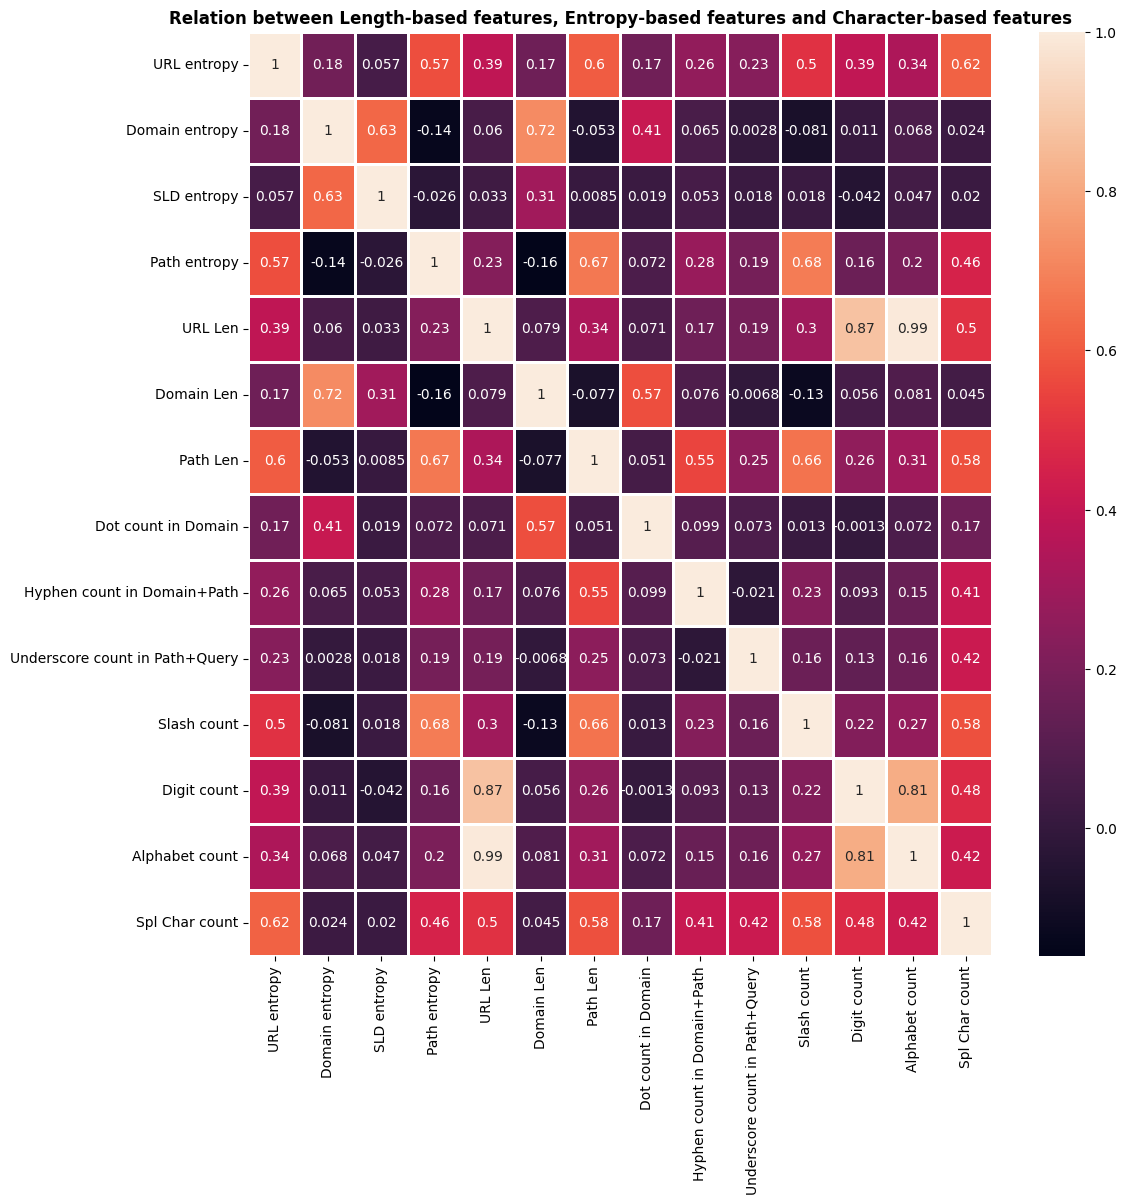

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(entropy_len_char_combined_df.select_dtypes('number').corr(),annot=True,linewidths=.75)

plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5],['URL entropy','Domain entropy','SLD entropy','Path entropy','URL Len','Domain Len','Path Len','Dot count in Domain','Hyphen count in Domain+Path','Underscore count in Path+Query','Slash count','Digit count','Alphabet count','Spl Char count'])
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5],['URL entropy','Domain entropy','SLD entropy','Path entropy','URL Len','Domain Len','Path Len','Dot count in Domain','Hyphen count in Domain+Path','Underscore count in Path+Query','Slash count','Digit count','Alphabet count','Spl Char count']);

plt.title('Relation between Length-based features, Entropy-based features and Character-based features',weight='bold');

***Insights***
- URL entropy increases mainly with path entropy, path length, slash count and special character count, meaning randomness in URLs mostly comes from long, complex paths with many separators.
- Domain entropy is strongly driven by domain length and moderately by SLD entropy showing that long or complex domains are typically more random.
- SLD entropy mainly correlates with domain entropy and weakly with other features, meaning randomness concentrated in the core domain rarely affects other URL components.
- Path entropy rises strongly with path length, slash count and special-character count indicating that long, deeply nested paths contribute most to URL randomness.
- URL length correlates strongly with alphabet count and digit count, showing that longer URLs mainly grow through alphanumeric expansion, not randomness.
- Domain length correlates strongly with domain entropy and dot count, showing that longer domain tends to include subdomains or less structured names.
- Path length increases with slash count, hyphen count and special-character count confirming deeper directory structures and more seperators drive longer paths.
- Dot count correlates with domain entropy and domain length, meaning more subdomains increase complexity.
- Hyphen count rises with path entropy and path length, showing hyphens are used more in complex paths.
- Underscore count correlates most with special character count, showing underscores behave like other non-alphanumeric separators.
- Slash count strongly correlates with path entropy, path length and special character count, indicating deep/dense directory structures.
- Digit count tracks URL length and alphabet count, meaning digits tend to appear more in longer URLs, not only in malicious ones.
- Alphabet count is almost perfectly correlated with URL length (0.99), showing longer URLs mostly grow by adding letters.
- Special-character count increases URL entropy, path entropy and path length, confirming malicious or complex URLs inject more symbols.

7. **Token Features Data**

In [72]:
token_feature_df.head()

,url,label,domain_token_count,path_token_count,total_tokens,avg_token_length
0,https://adoaeco.cn/Loggin,phishing,2,1,3,5.00
1,https://gageparkhighschool.com/QTeuUe,phishing,2,1,3,9.00
2,https://wwnox.miraltek.cfd/qzxn3,phishing,3,1,4,5.25
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,2,1,3,8.50
4,https://yqcjl.miraltek.cfd/plis0,phishing,3,1,4,5.25


In [73]:
token_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   url                 253051 non-null  object 
 1   label               253051 non-null  object 
 2   domain_token_count  253051 non-null  int64  
 3   path_token_count    253051 non-null  int64  
 4   total_tokens        253051 non-null  int64  
 5   avg_token_length    253051 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 11.6+ MB


In [74]:
token_feature_df.describe()

,domain_token_count,path_token_count,total_tokens,avg_token_length
count,253051.000000,253051.000000,253051.000000,253051.000000
mean,3.138442,2.250412,5.388854,6.062778
std,0.979148,2.548454,2.773534,3.970801
min,0.000000,0.000000,0.000000,1.250000
25%,3.000000,1.000000,4.000000,4.666667
50%,3.000000,2.000000,5.000000,5.500000
75%,4.000000,3.000000,6.000000,6.700000
max,27.000000,43.000000,46.000000,944.000000


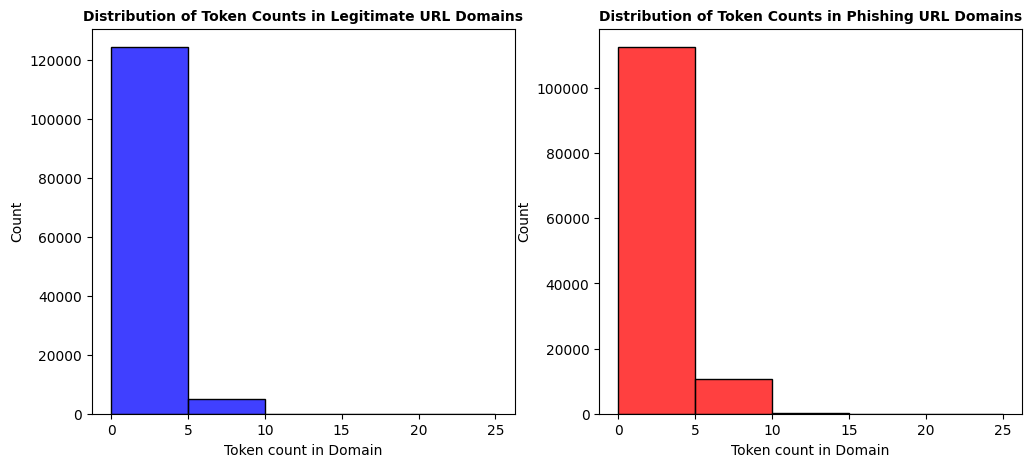

In [75]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'legitimate'],x='domain_token_count',bins=range(0,30,5),ax=ax[0],color='blue')
ax[0].set_title("Distribution of Token Counts in Legitimate URL Domains",weight='bold',fontsize=10)
ax[0].set_xlabel('Token count in Domain')

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'phishing'],x='domain_token_count',bins=range(0,30,5),ax=ax[1],color='red')
ax[1].set_title("Distribution of Token Counts in Phishing URL Domains",weight='bold',fontsize=10)
ax[1].set_xlabel('Token count in Domain');

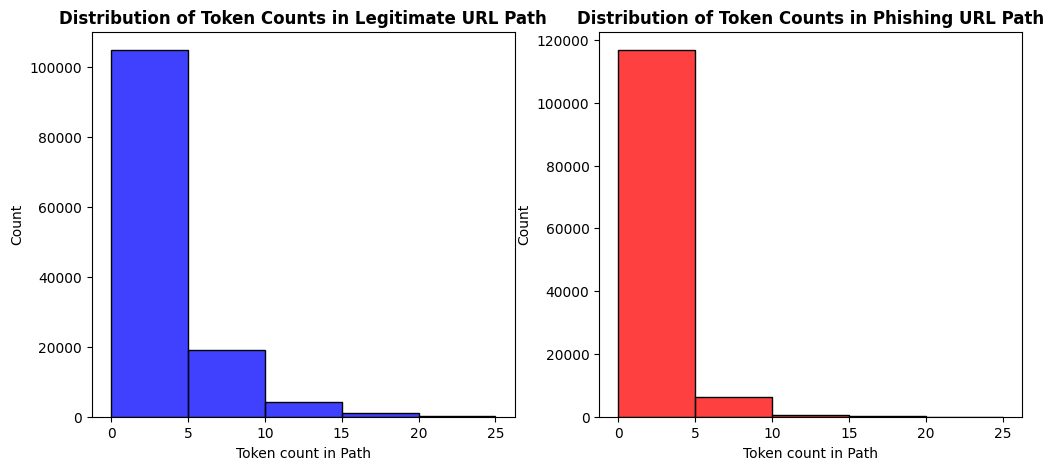

In [76]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'legitimate'],x='path_token_count',bins=range(0,30,5),ax=ax[0],color='blue')
ax[0].set_title("Distribution of Token Counts in Legitimate URL Path",weight='bold')
ax[0].set_xlabel('Token count in Path')

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'phishing'],x='path_token_count',bins=range(0,30,5),ax=ax[1],color='red')
ax[1].set_title("Distribution of Token Counts in Phishing URL Path",weight='bold')
ax[1].set_xlabel('Token count in Path');

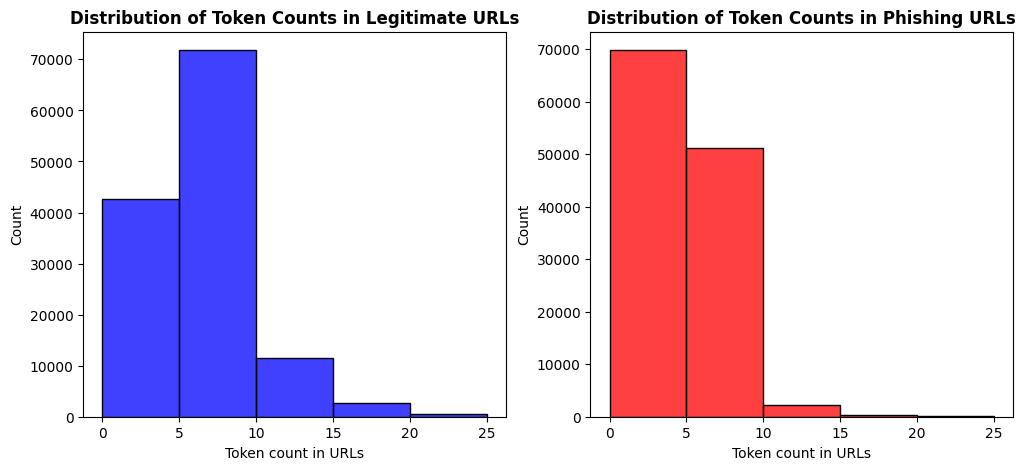

In [77]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'legitimate'],x='total_tokens',bins=range(0,30,5),ax=ax[0],color='blue')
ax[0].set_title("Distribution of Token Counts in Legitimate URLs",weight='bold')
ax[0].set_xlabel('Token count in URLs')

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'phishing'],x='total_tokens',bins=range(0,30,5),ax=ax[1],color='red')
ax[1].set_title("Distribution of Token Counts in Phishing URLs",weight='bold')
ax[1].set_xlabel('Token count in URLs');

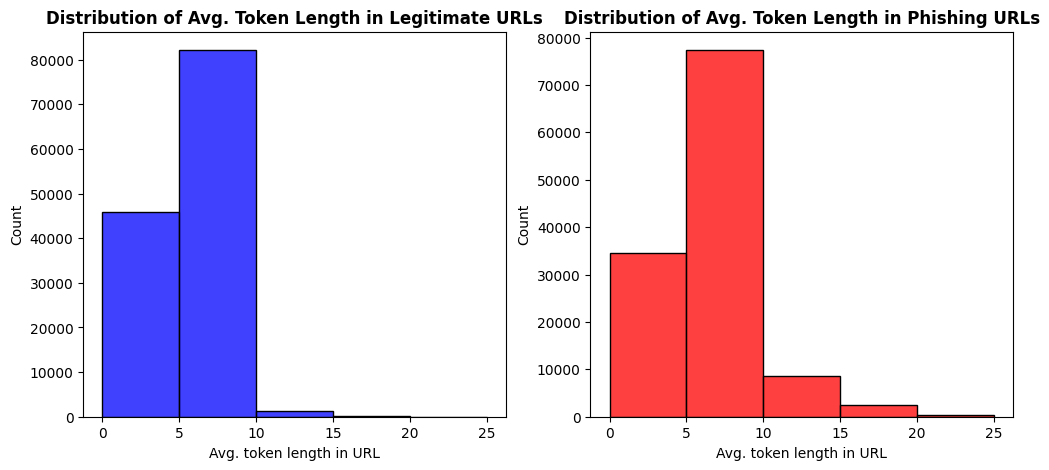

In [78]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'legitimate'],x='avg_token_length',bins=range(0,30,5),ax=ax[0],color='blue')
ax[0].set_title("Distribution of Avg. Token Length in Legitimate URLs",weight='bold')
ax[0].set_xlabel('Avg. token length in URL')

sns.histplot(data=token_feature_df[token_feature_df['label'] == 'phishing'],x='avg_token_length',bins=range(0,30,5),ax=ax[1],color='red')
ax[1].set_title("Distribution of Avg. Token Length in Phishing URLs",weight='bold')
ax[1].set_xlabel('Avg. token length in URL');

***Insights***
- Both Domain token count histograms show a very large peak at 0 tokens, phishing URLs histogram has a visibly larger tail in the 1–9 range than legitimate.
- Both Path token count histograms have a dominant 0 bin, but the legitimate path histogram shows more visible frequency in mid-to-high token bins, while the phishing path histogram is more concentrated at 0 with fewer high-token bins.
- The legitimate URL histogram of token count shows clear mid-range, the phishing URL histogram of token count is more concentrated toward lower token counts with fewer mid-range bars.
- Both avg. token length distributions are concentrated in the low-to-mid range, but the phishing avg. token length histogram is visibly shifted slightly to the right compared with legitimate

In [79]:
df_dict.keys()

dict_keys(['URL components', 'Length features', 'Domain features', 'SLD features', 'Character features', 'Entropy features', 'Token features', 'Hexadecimal features'])

8. **Hexadecimal Features Data**

In [80]:
hex_feature_df.head()

,url,label,has_hex,hex_char_count,hex_ratio
0,https://adoaeco.cn/Loggin,phishing,False,0,0.0
1,https://gageparkhighschool.com/QTeuUe,phishing,False,0,0.0
2,https://wwnox.miraltek.cfd/qzxn3,phishing,False,0,0.0
3,https://halfetitur.com/?token=r2I0IU0FEHfPf5Dn,phishing,False,0,0.0
4,https://yqcjl.miraltek.cfd/plis0,phishing,False,0,0.0


In [81]:
hex_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253051 entries, 0 to 253050
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   url             253051 non-null  object 
 1   label           253051 non-null  object 
 2   has_hex         253051 non-null  bool   
 3   hex_char_count  253051 non-null  int64  
 4   hex_ratio       253051 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 8.0+ MB


In [82]:
hex_feature_df.describe()

,hex_char_count,hex_ratio
count,253051.000000,253051.000000
mean,0.185425,0.001330
std,2.778447,0.011285
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,528.000000,0.637681


In [83]:
hex_feature_df[['has_hex']].describe()

,has_hex
count,253051
unique,2
top,False
freq,247225


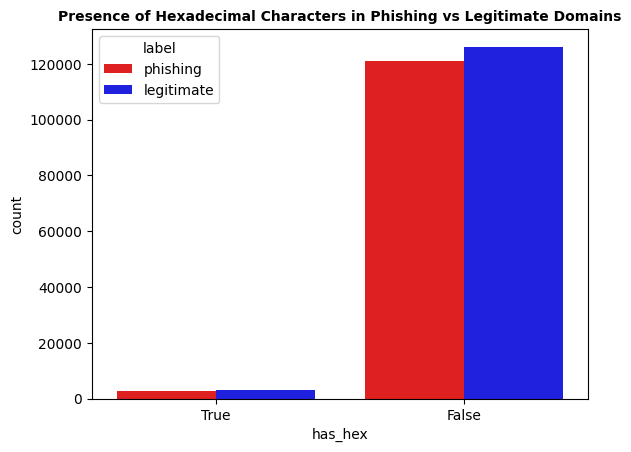

In [84]:
sns.countplot(data=hex_feature_df,x='has_hex',hue='label',order=[True,False],hue_order=['phishing','legitimate'],palette=['red','blue'])
plt.title('Presence of Hexadecimal Characters in Phishing vs Legitimate Domains',weight='bold',fontsize=10);

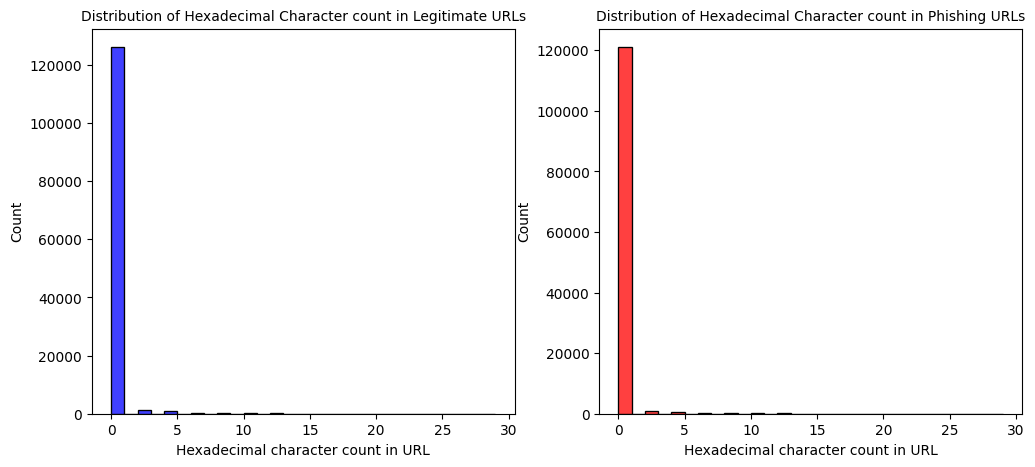

In [85]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=hex_feature_df[hex_feature_df['label'] == 'legitimate'],x='hex_char_count',ax=ax[0],bins=range(0,30),color='blue')
ax[0].set_title("Distribution of Hexadecimal Character count in Legitimate URLs",fontsize=10)
ax[0].set_xlabel('Hexadecimal character count in URL')

sns.histplot(data=hex_feature_df[hex_feature_df['label'] == 'phishing'],x='hex_char_count',ax=ax[1],bins=range(0,30),color='red')
ax[1].set_title("Distribution of Hexadecimal Character count in Phishing URLs",fontsize=10)
ax[1].set_xlabel('Hexadecimal character count in URL');

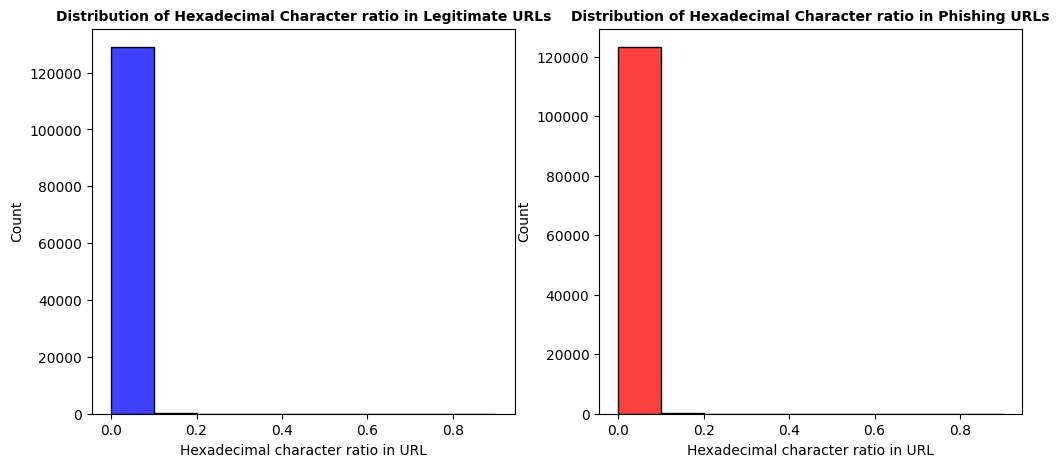

In [86]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=hex_feature_df[hex_feature_df['label'] == 'legitimate'],x='hex_ratio',ax=ax[0],bins=np.arange(0,1,0.1),color='blue')
ax[0].set_title("Distribution of Hexadecimal Character ratio in Legitimate URLs",fontsize=10,weight='bold')
ax[0].set_xlabel('Hexadecimal character ratio in URL')

sns.histplot(data=hex_feature_df[hex_feature_df['label'] == 'phishing'],x='hex_ratio',ax=ax[1],bins=np.arange(0,1,0.1),color='red')
ax[1].set_title("Distribution of Hexadecimal Character ratio in Phishing URLs",fontsize=10,weight='bold')
ax[1].set_xlabel('Hexadecimal character ratio in URL');

***Insights***
- Both phishing and legitimate domains show very small counts of presence of Hexadecimal characters.
- Both classes have almost all URLs with zero hexadecimal characters, with only a small number having 1 or more.
- The hexadecimal ratio is extremely close to zero for almost all URLs in both classes.

#### **Conclusions**

- The URL components, domain features, and SLD features dataframes contain null values mainly due to missing components or failed parsing.
- URLs with IP addresses produce null TLDs, and intentionally malformed URLs produce null SLDs.
- The dataset is balanced, containing roughly equal numbers of phishing and legitimate URLs
- The dataset includes three protocols (https, http, ftp), with legitimate URLs mostly using https, while phishing URLs split between http and https.
- ftp URLs are extremely rare and appear only in phishing URLs.
- Phishing URLs have more missing subdomains compared to legitimate URLs.
- Null TLDs are extremely rare in both phishing and legitimate URLs.
- Both phishing and legitimate URLs mostly contain non-null paths.
- Phishing URLs contain more null queries, while legitimate URLs use query parameters more frequently.
- Phishing URLs strongly favor low-cost TLDs like .com, .net, .top, .icu, .dev, and .app, whereas legitimate URLs appear more often under reputable TLDs like .org, .net, .edu, .ca.
- Phishing URLs frequently use free hosting platforms or URL shorteners, as shown by SLDs like weebly, firebaseapp, qrco, or bit.
- Phishing URLs show a longer right-skewed distribution in URL length, path length, and query length, indicating longer and more complex structures.
- Phishing domains tend to be either unusually short or unusually long, unlike legitimate domains.
- Phishing URLs exhibit deeper directory structures, with more levels in the path compared to legitimate URLs.
- Phishing URLs contain more multi-level subdomains than legitimate URLs.
- URL length increases mainly with path length and query length, showing that longer URLs are driven by these components.
- Phishing URLs show greater variation in TLD length compared to legitimate URLs.
- IPv4-based URLs are rare in both classes but appear slightly more often in phishing URLs.
- Non-standard port numbers are used slightly more often in phishing URLs but remain rare overall.
- SLD length distributions for phishing and legitimate URLs are nearly identical, offering no class distinction.
- Phishing SLDs contain more hyphens and digits than legitimate SLDs, indicating attackers modify SLDs with characters to mimic brand patterns.
- Phishing domains show slightly higher SLD token counts, reflecting an attempt to split SLDs into brand-like segments.
- Phishing URLs show higher dot count and more slashes, deeper directory structures, more digits, and more special characters than legitimate URLs.
- Path entropy varies greatly and is higher for phishing URLs, while URL entropy and domain entropy also show more spread for phishing URLs.
- Hexadecimal characters (presence, count, ratio) appear almost identically in both phishing and legitimate URLs and provide no distinguishing signal.